In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

In [6]:
df = pd.read_csv("C:/Users/angel/Documents/covid 19/covid_19_clean_complete.csv")

In [7]:
df.head(5)

Province/State Country/Region       Date  Confirmed  Deaths  Recovered  \
0            NaN    Afghanistan  1/22/2020          0       0          0   
1            NaN        Albania  1/22/2020          0       0          0   
2            NaN        Algeria  1/22/2020          0       0          0   
3            NaN        Andorra  1/22/2020          0       0          0   
4            NaN         Angola  1/22/2020          0       0          0   

   Active             WHO Region  
0       0  Eastern Mediterranean  
1       0                 Europe  
2       0                 Africa  
3       0                 Europe  
4       0                 Africa

In [8]:
df.drop(['WHO Region'],axis=1,inplace=True)

In [9]:
df.rename(columns={'Province/State':'State','Country/Region':'Country'},inplace=True)

In [10]:
df['Date']= pd.to_datetime(df['Date'])

In [11]:
imputer = SimpleImputer(strategy="constant")
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [12]:
df3 = df2.groupby(['Country','Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

C:\Users\angel\AppData\Local\Temp\ipykernel_23868\2082749019.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  df3 = df2.groupby(['Country','Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()


In [31]:
df3.head(5)

Country       Date  Confirmed  Deaths  Recovered
0  Afghanistan 2020-01-22          0       0          0
1  Afghanistan 2020-01-23          0       0          0
2  Afghanistan 2020-01-24          0       0          0
3  Afghanistan 2020-01-25          0       0          0
4  Afghanistan 2020-01-26          0       0          0

In [33]:
countries = df3['Country'].unique()
len(countries)

187

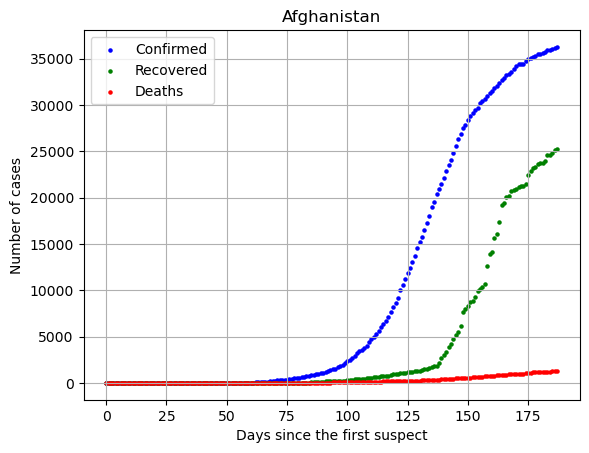

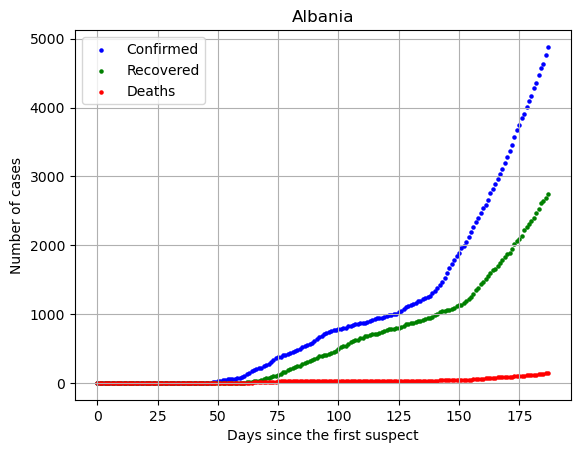

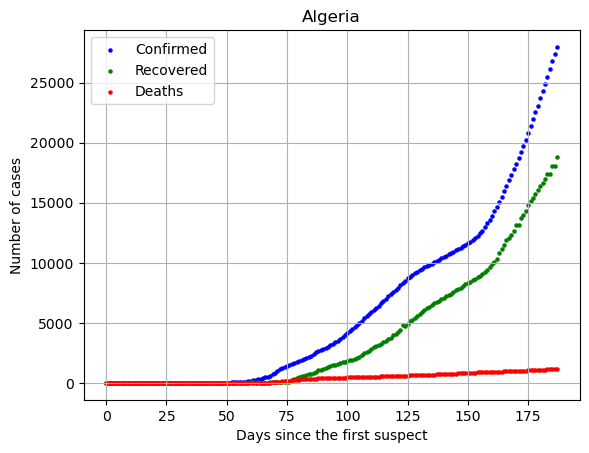

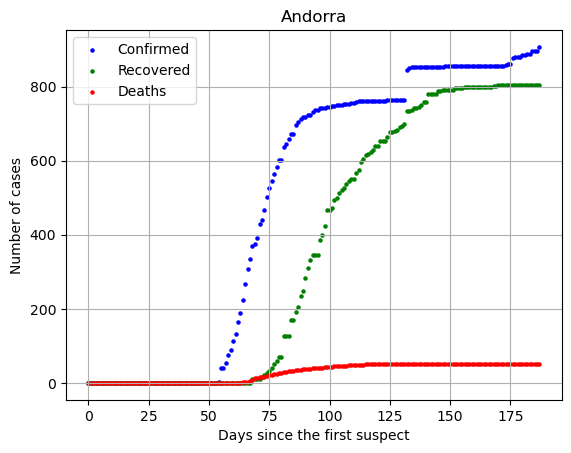

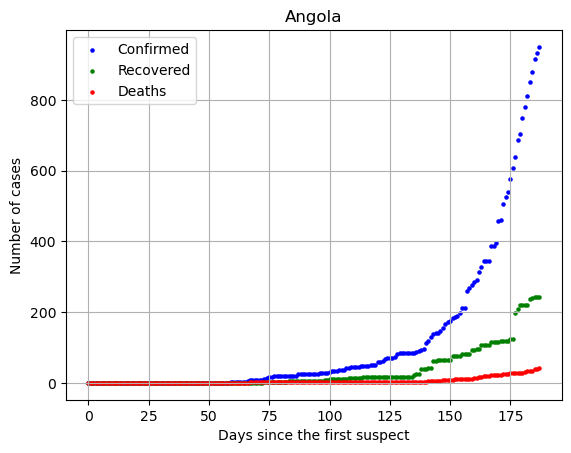

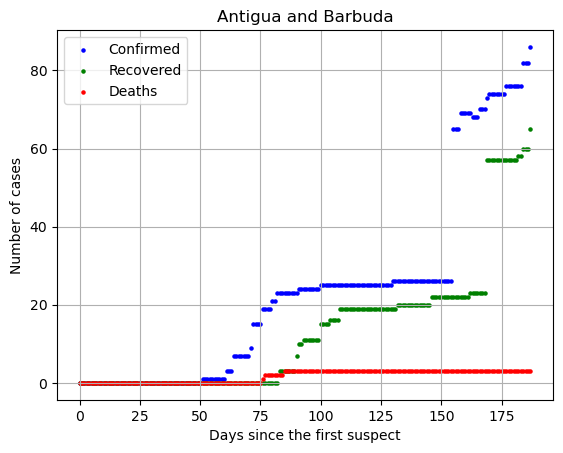

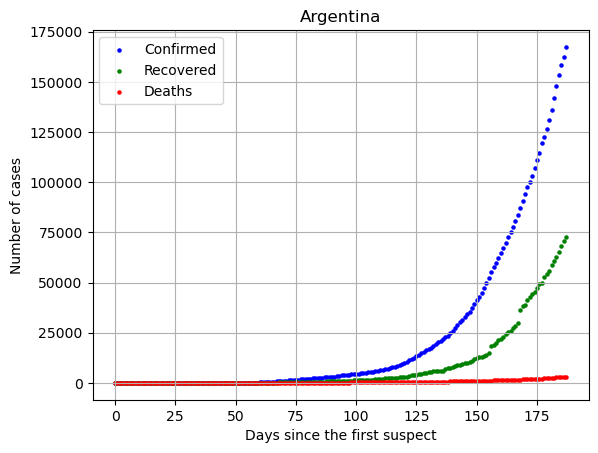

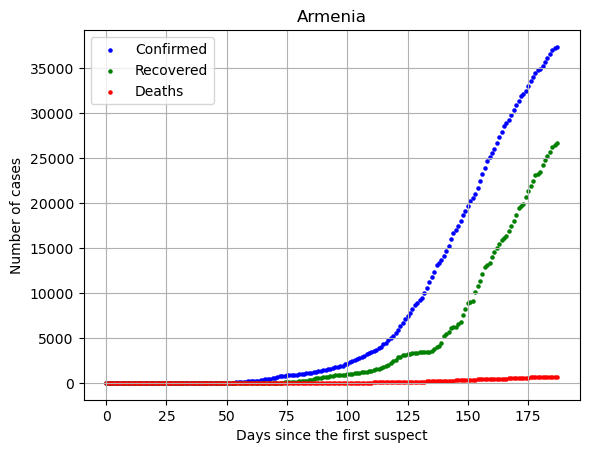

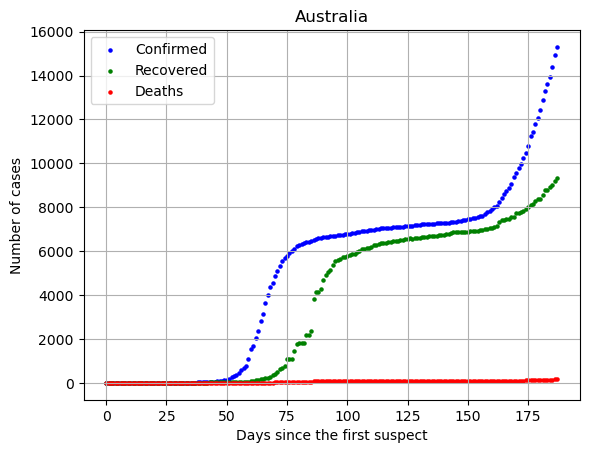

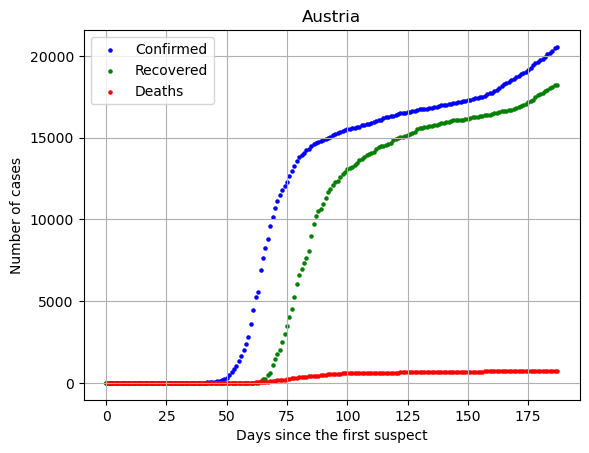

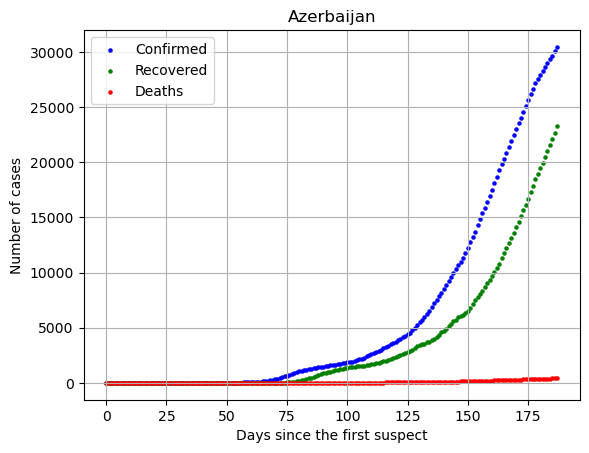

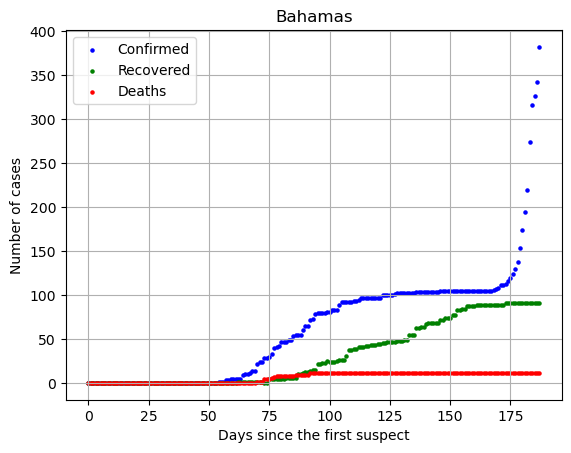

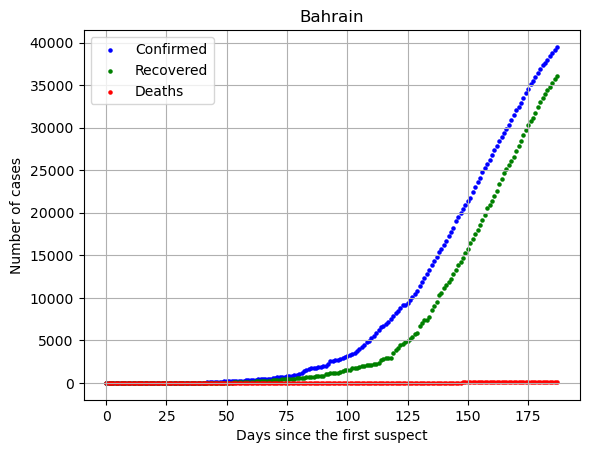

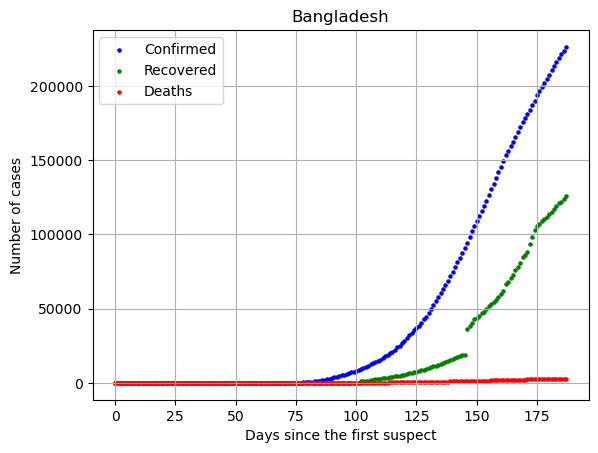

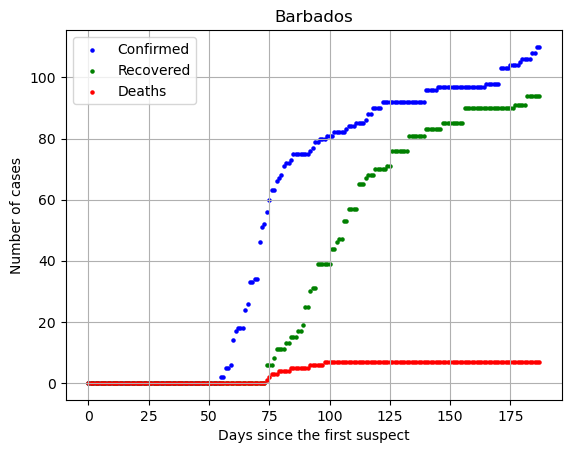

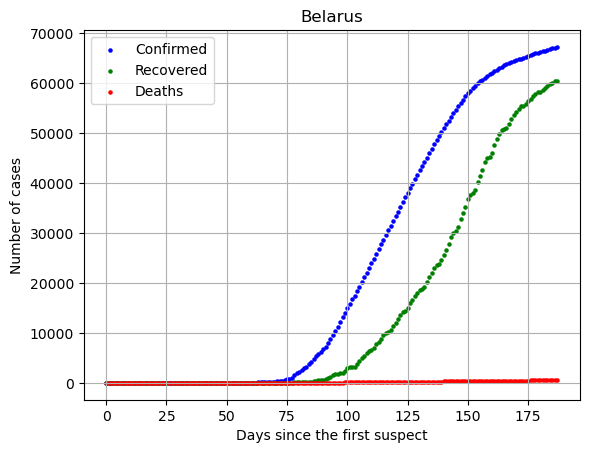

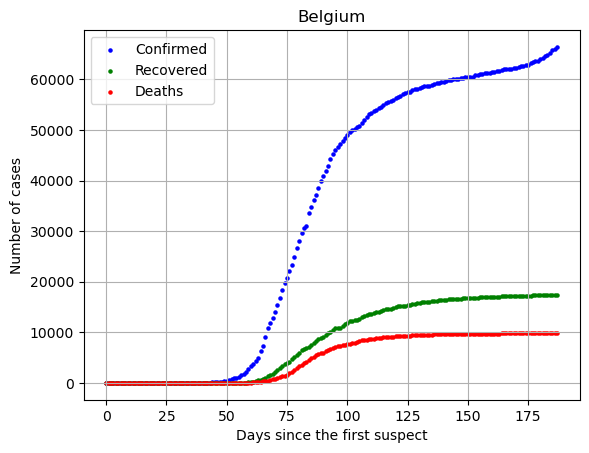

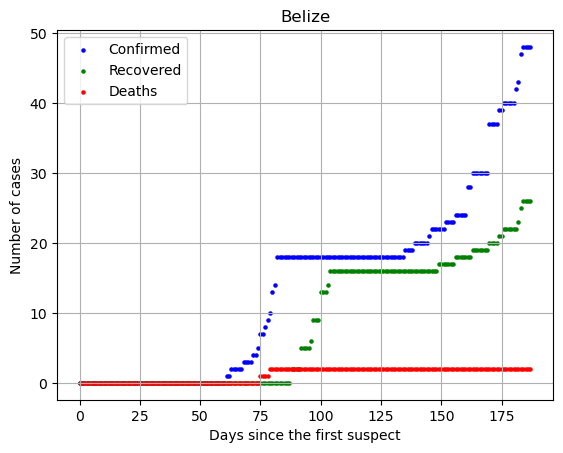

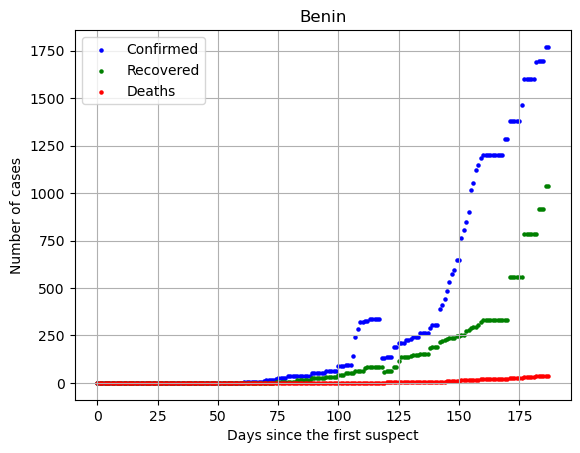

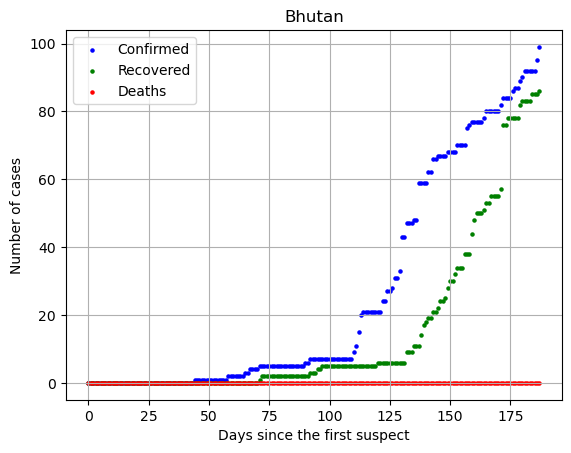

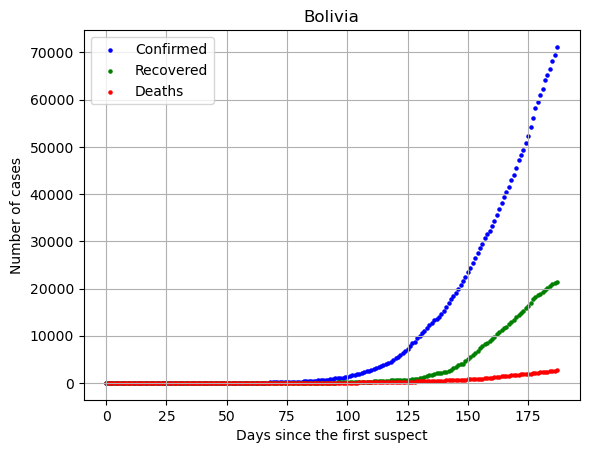

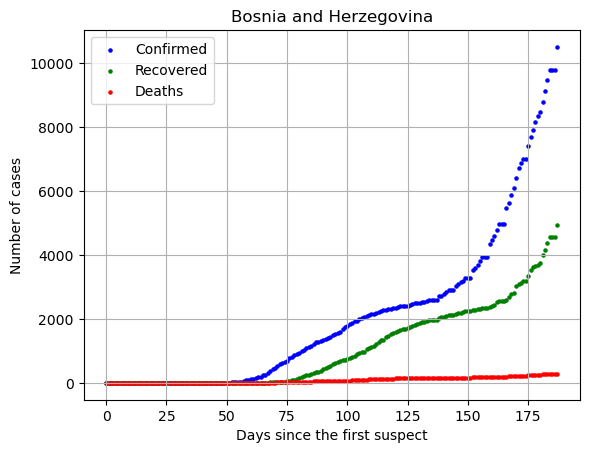

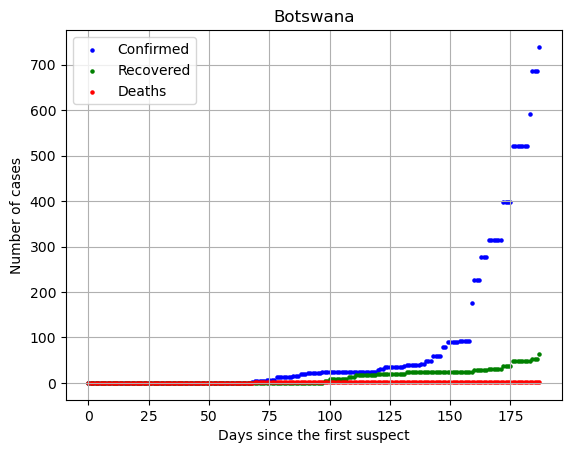

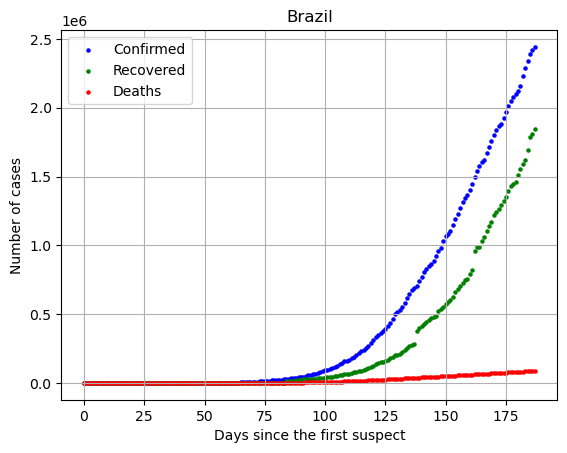

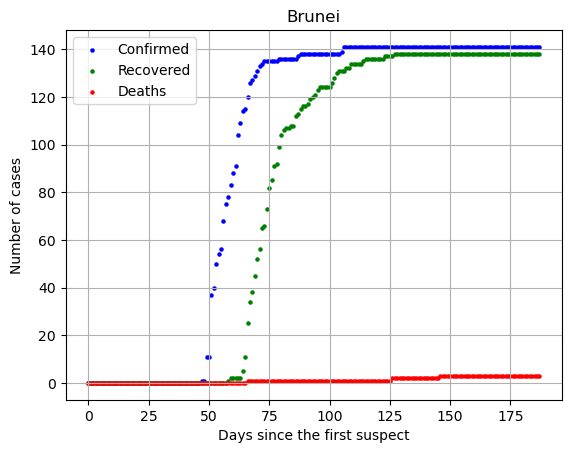

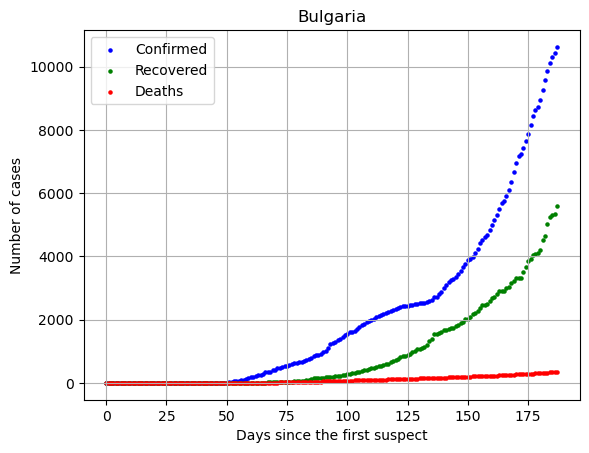

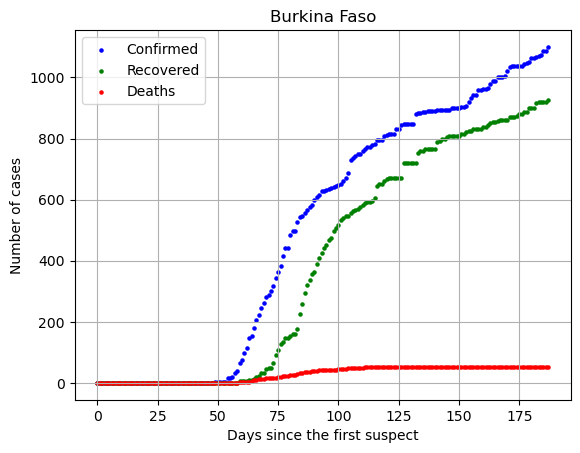

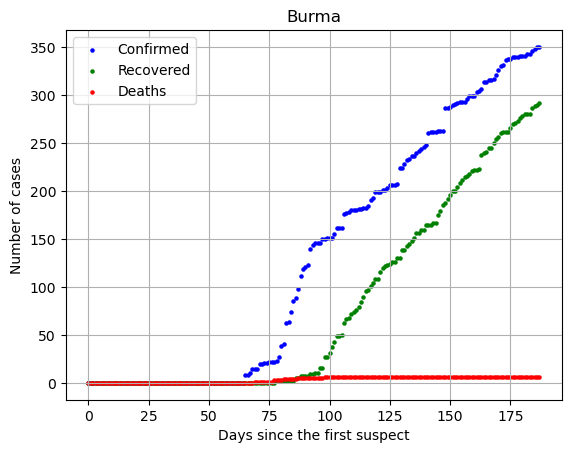

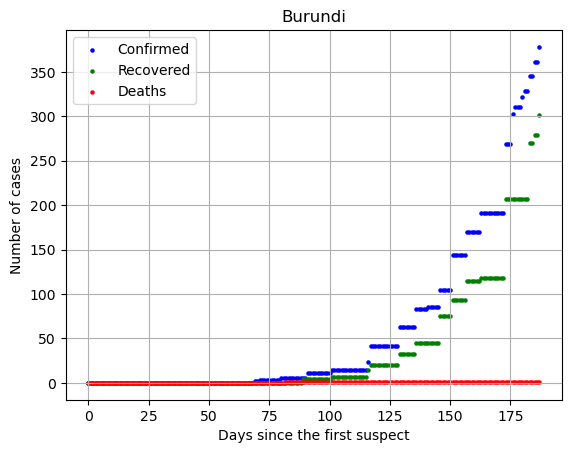

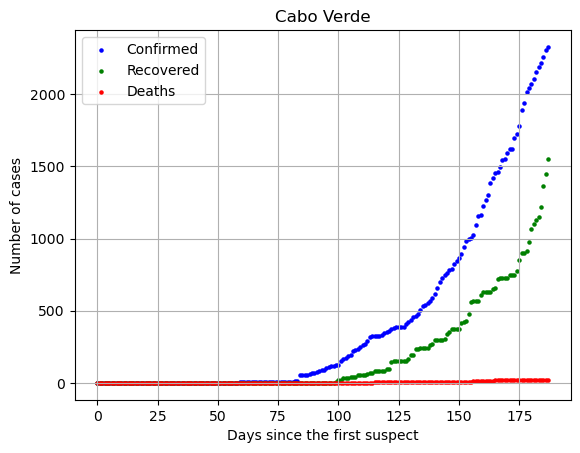

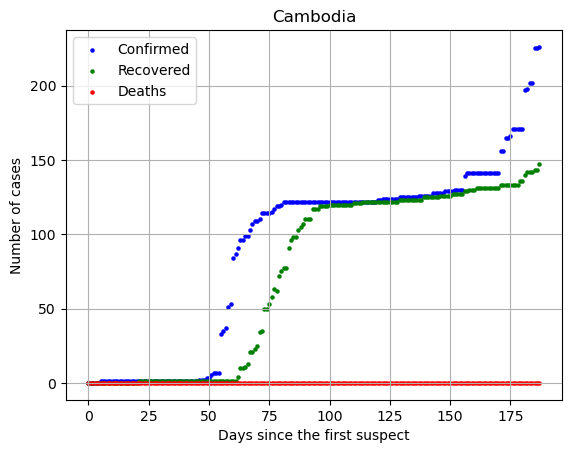

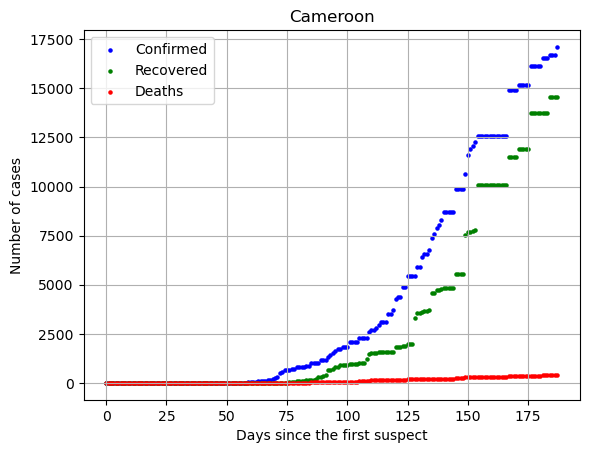

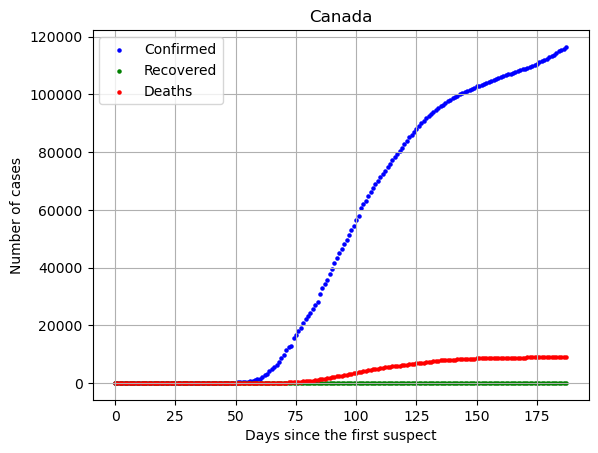

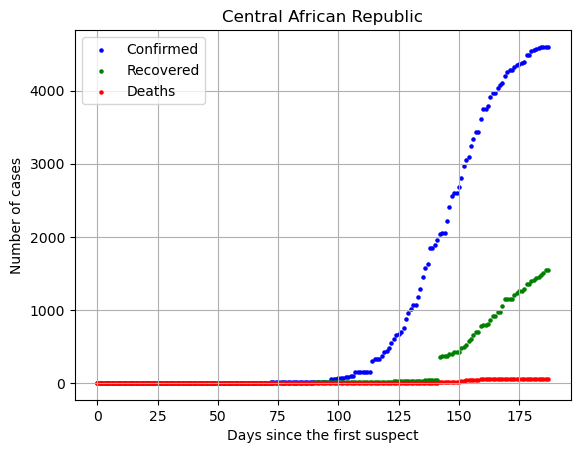

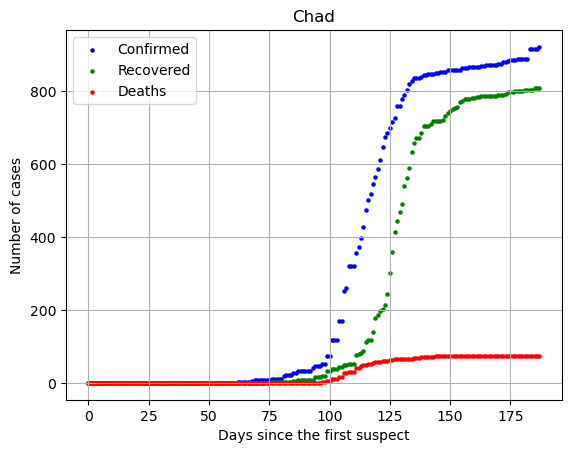

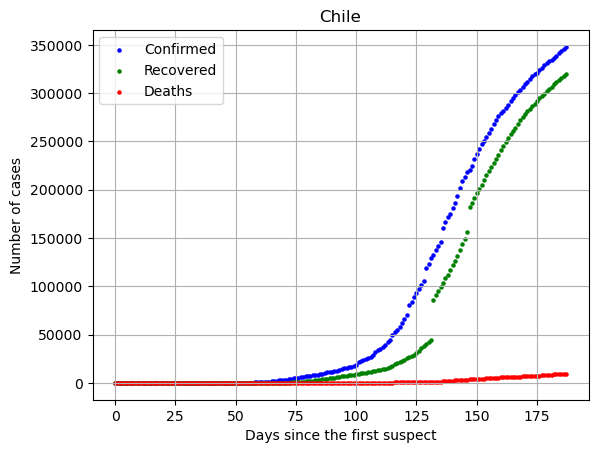

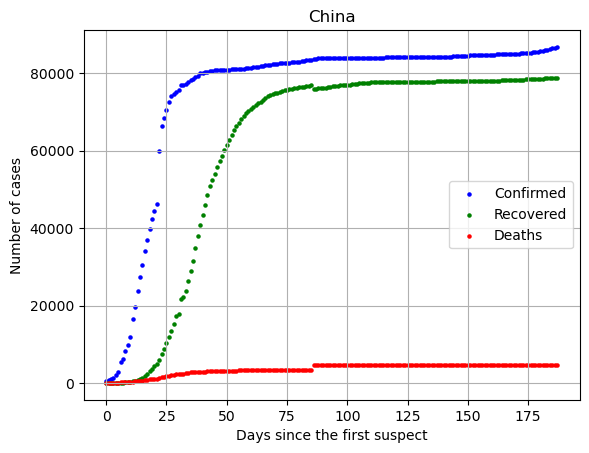

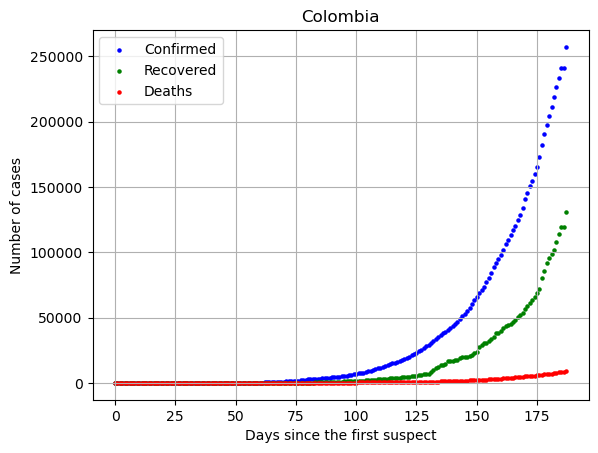

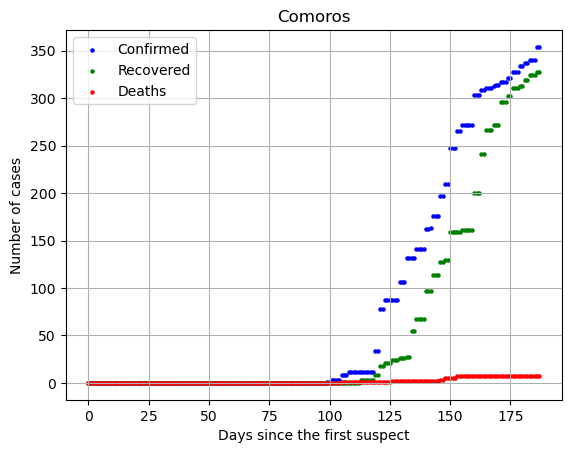

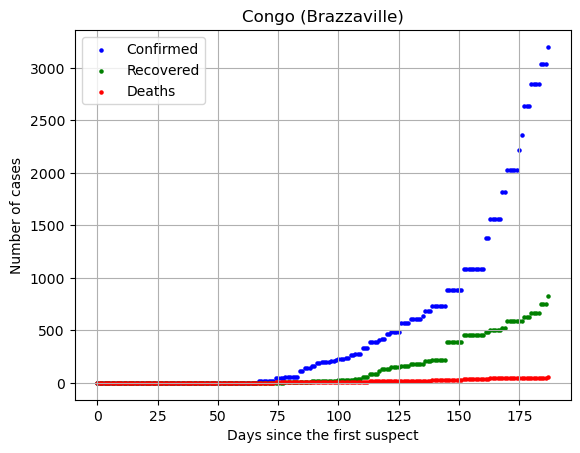

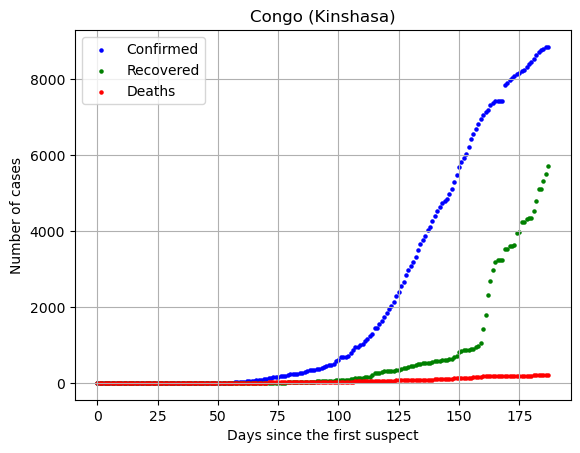

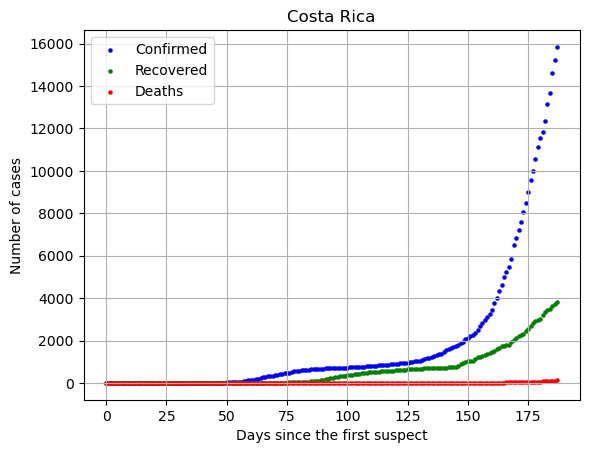

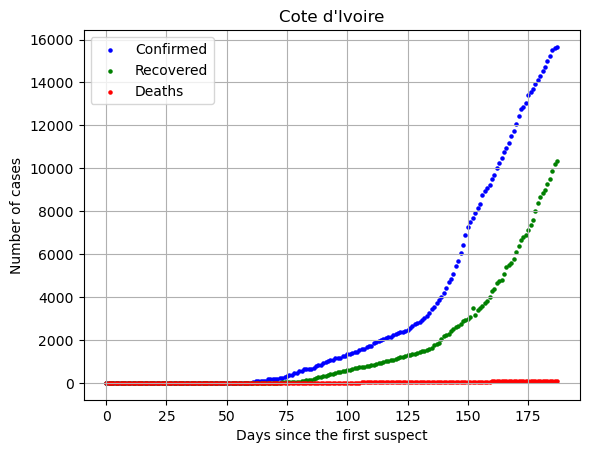

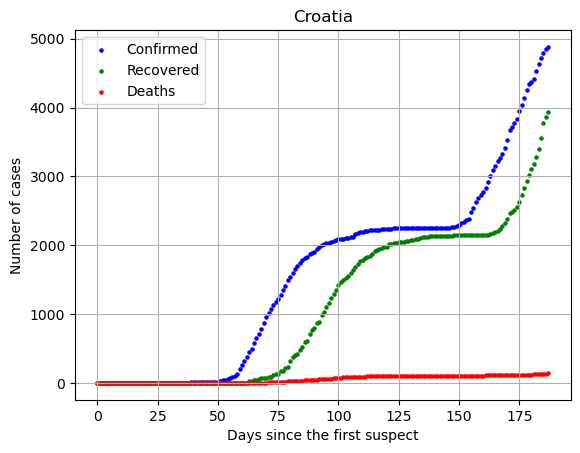

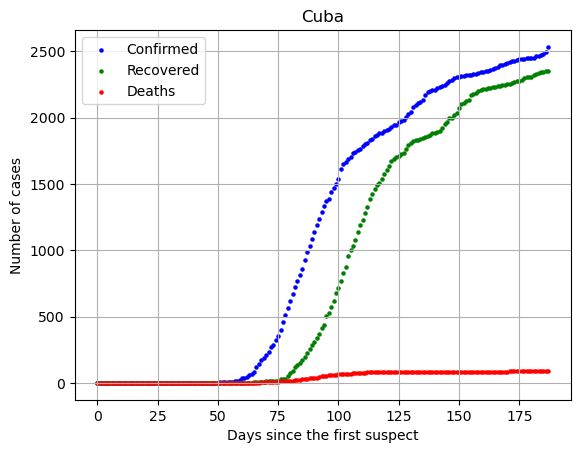

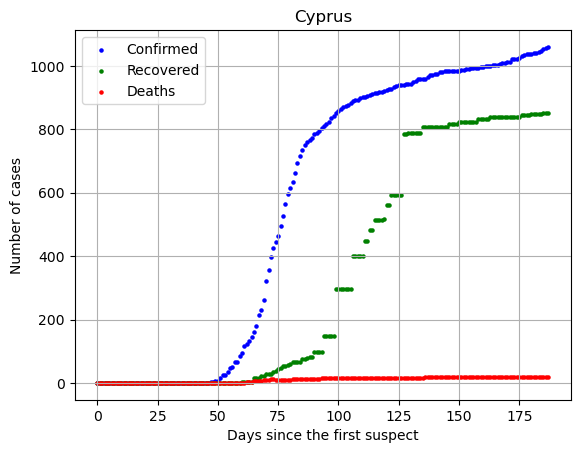

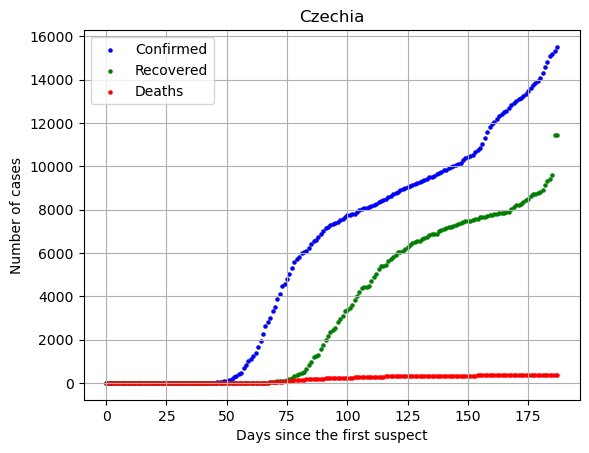

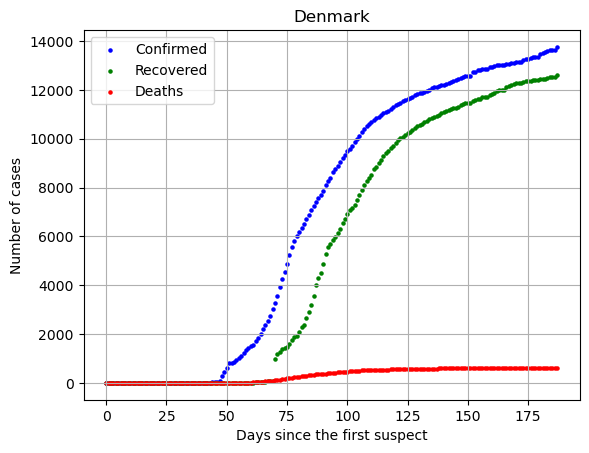

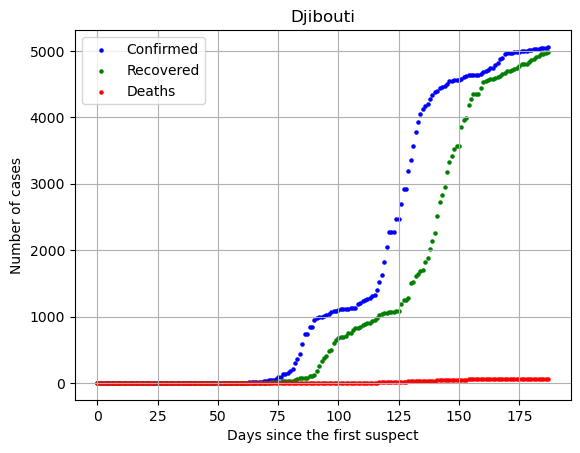

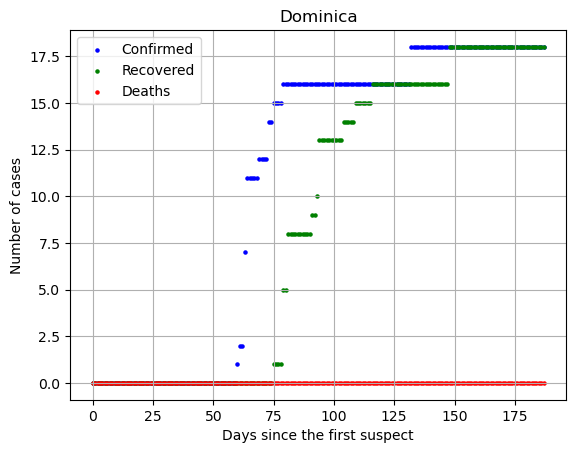

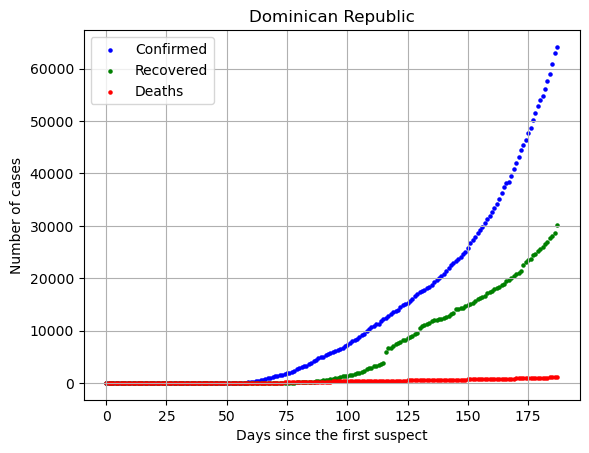

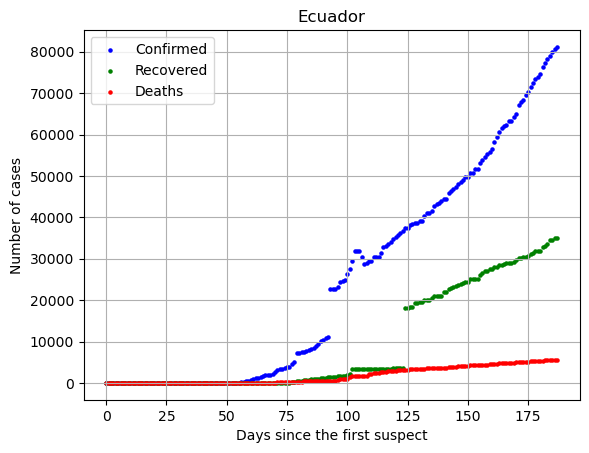

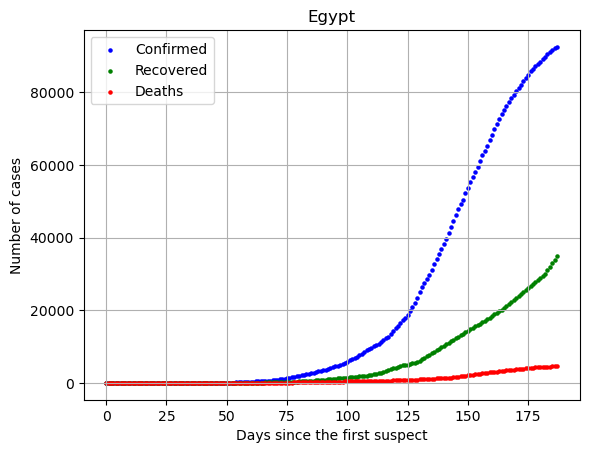

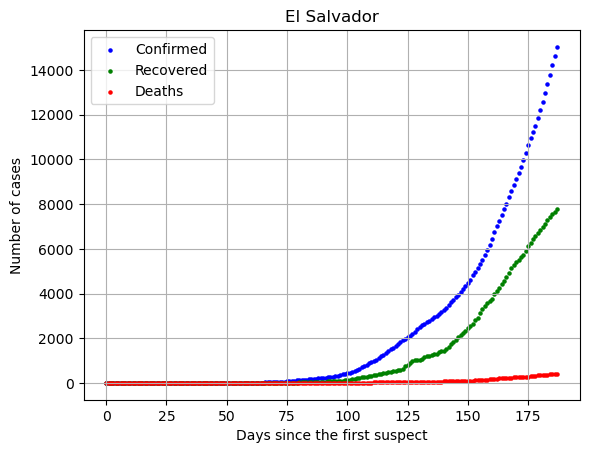

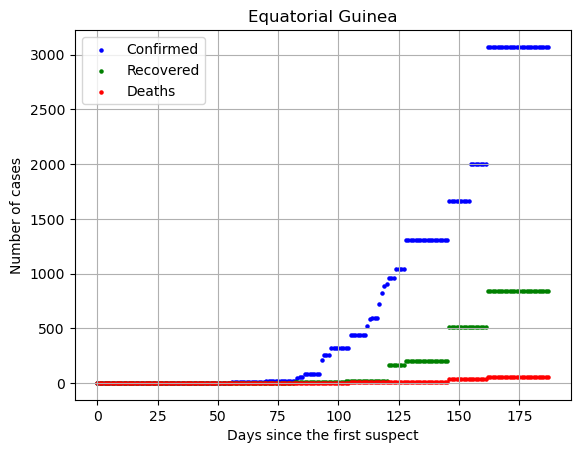

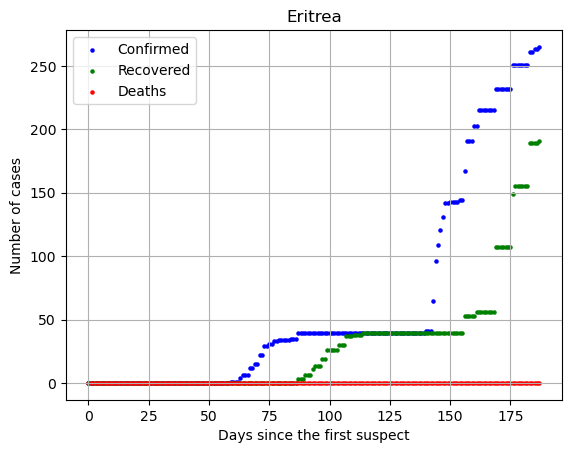

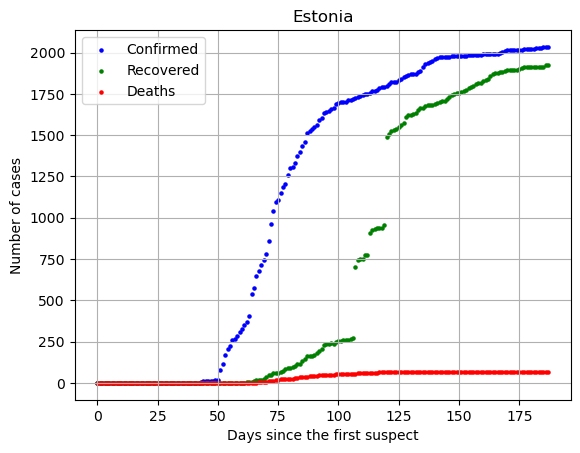

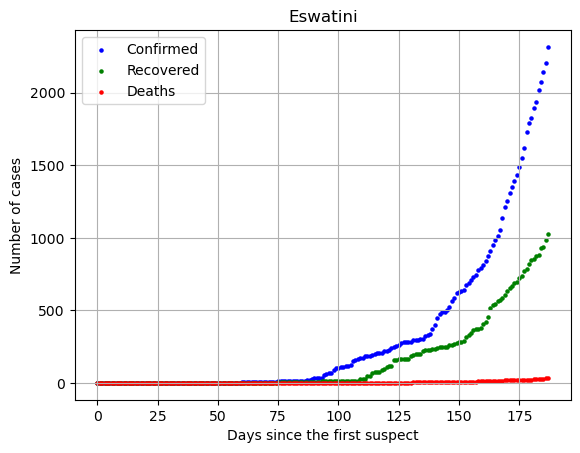

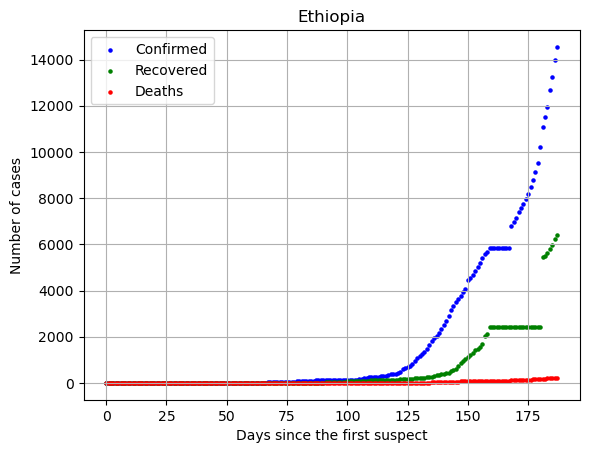

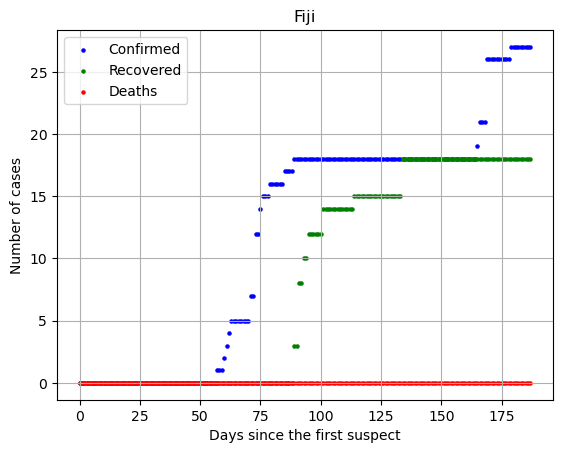

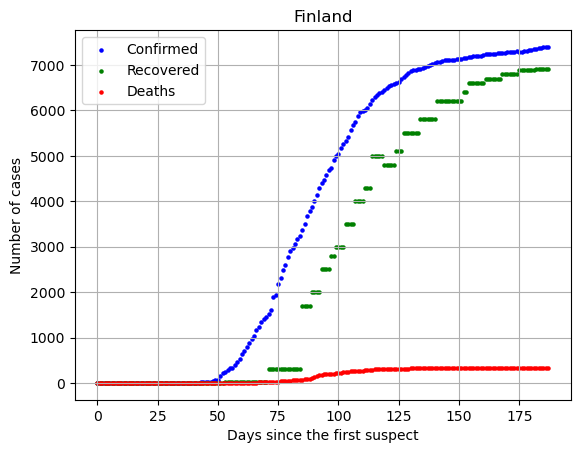

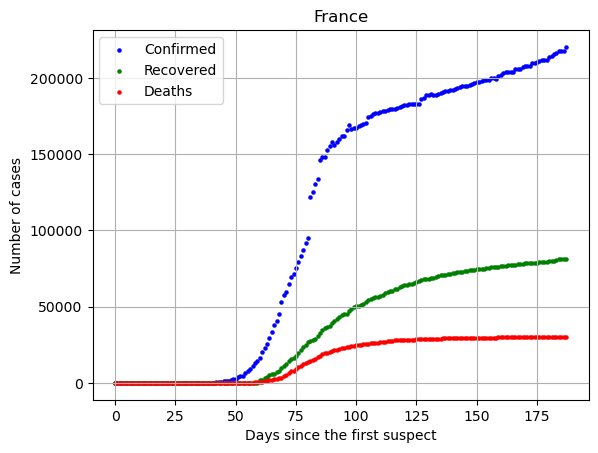

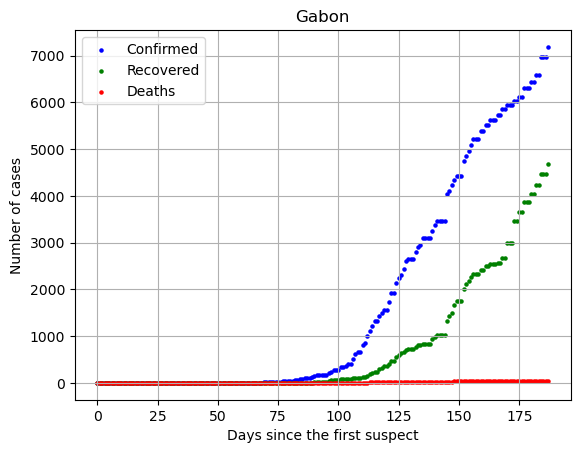

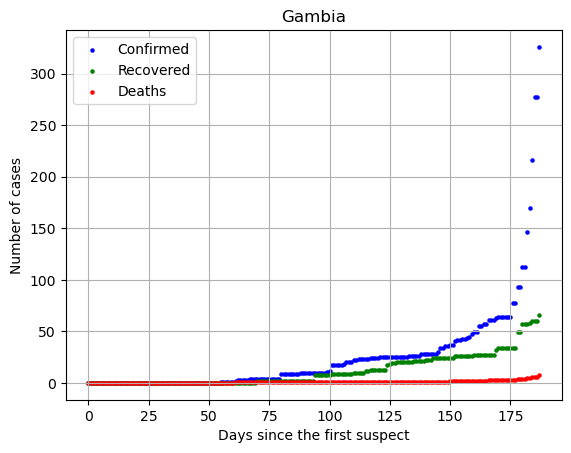

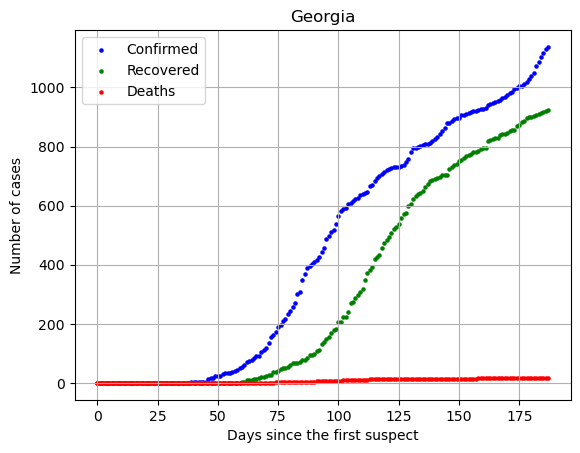

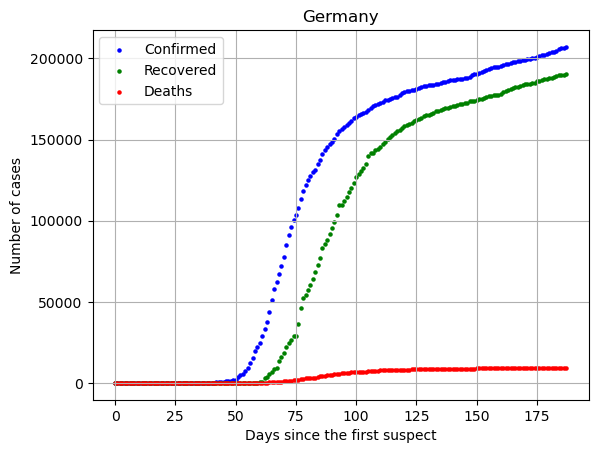

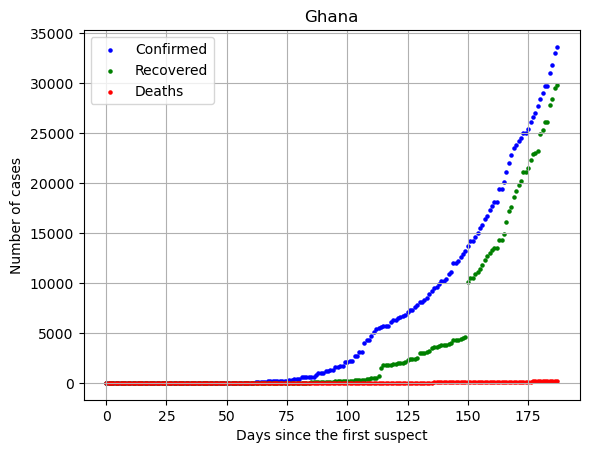

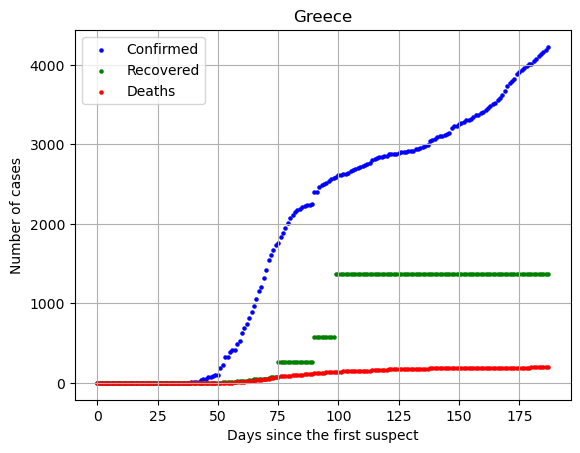

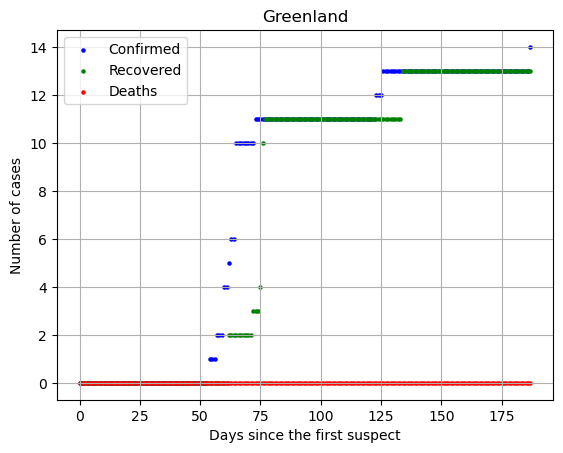

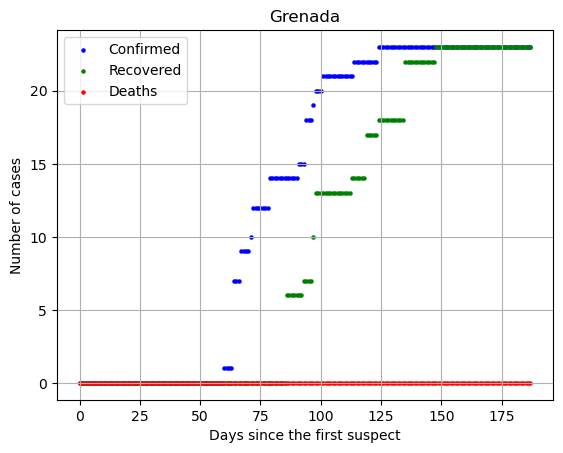

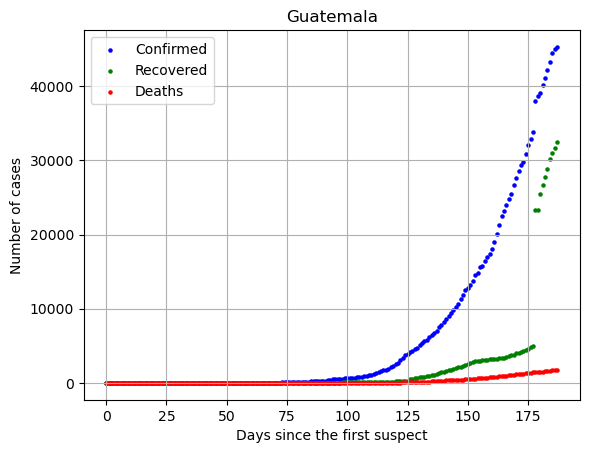

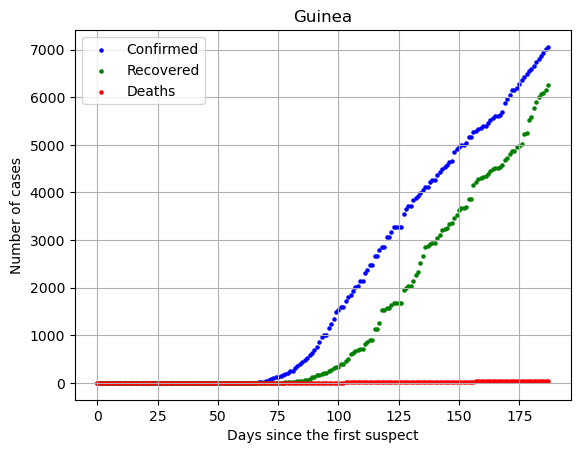

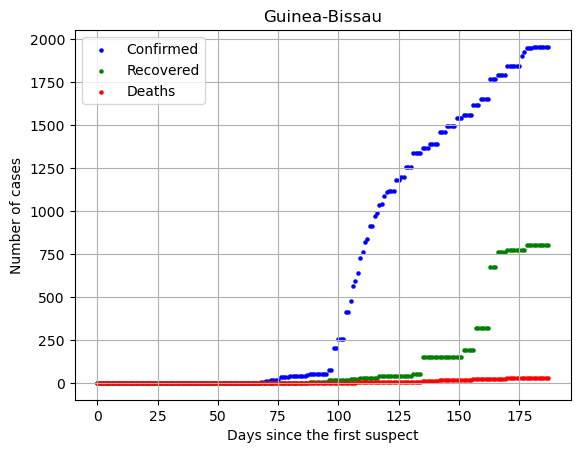

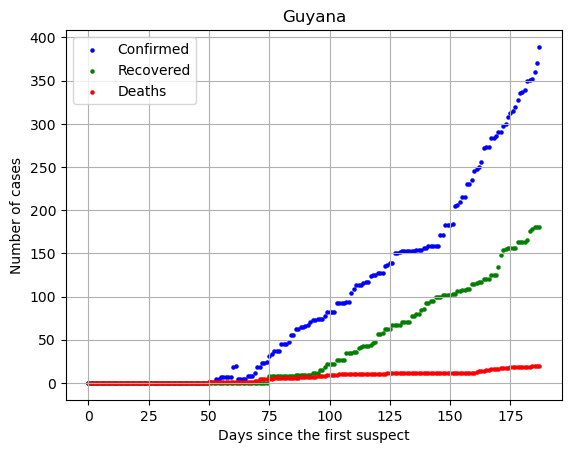

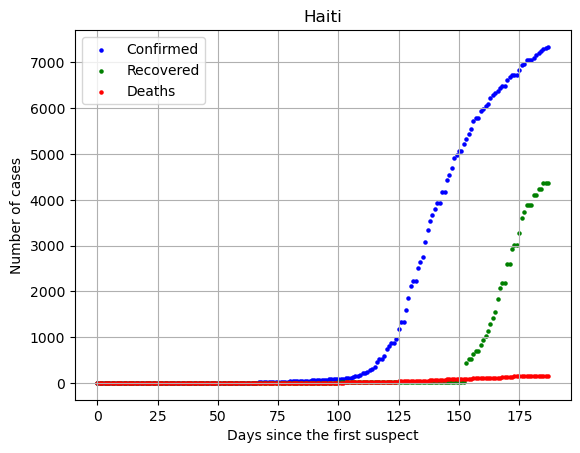

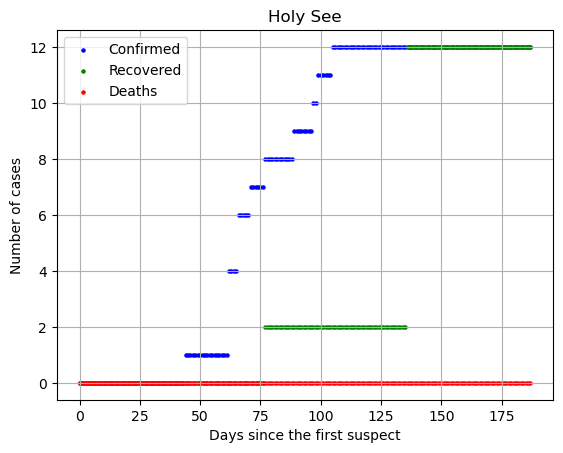

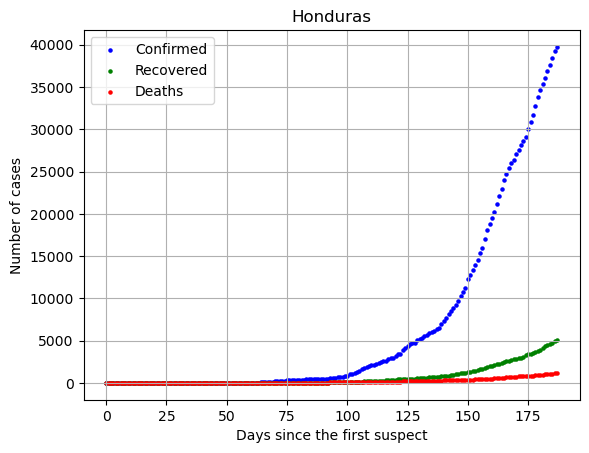

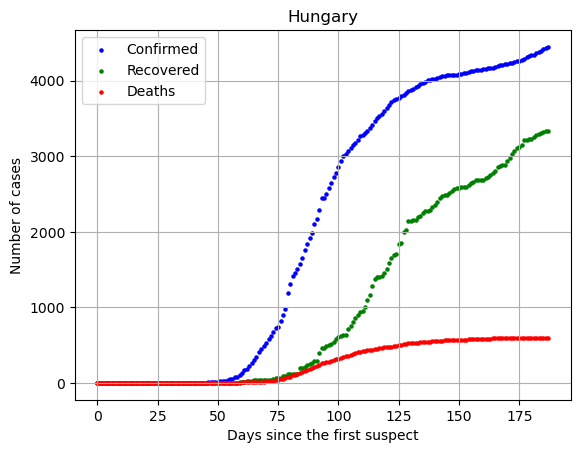

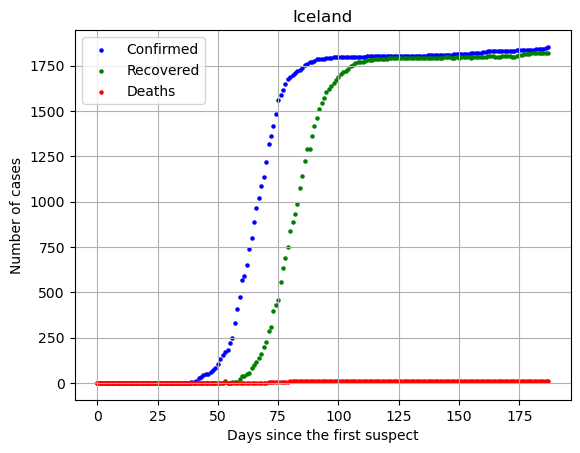

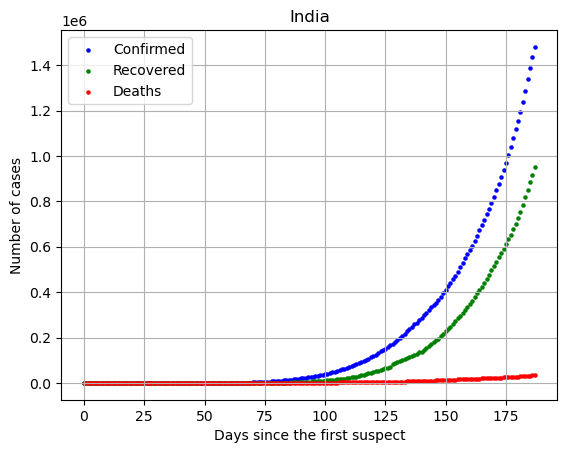

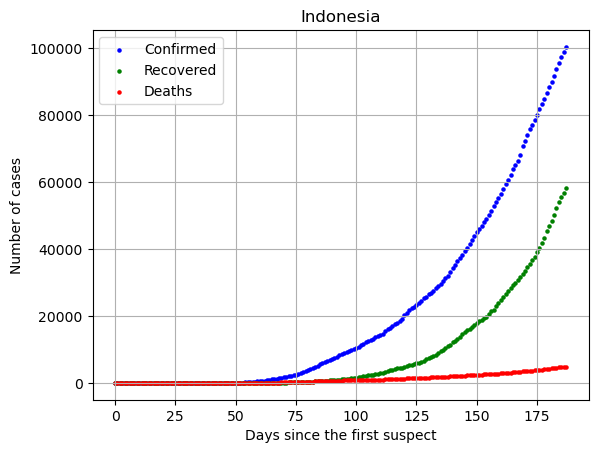

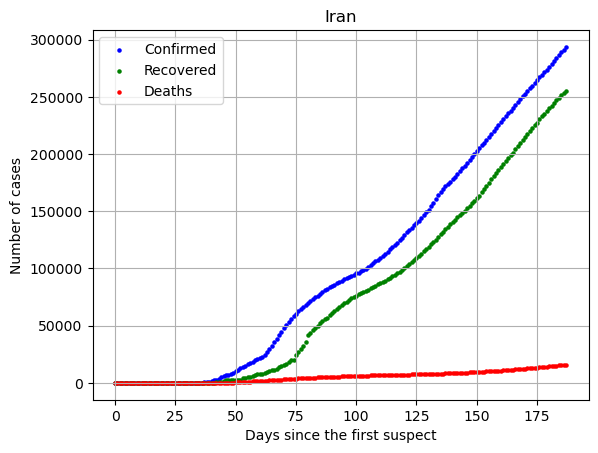

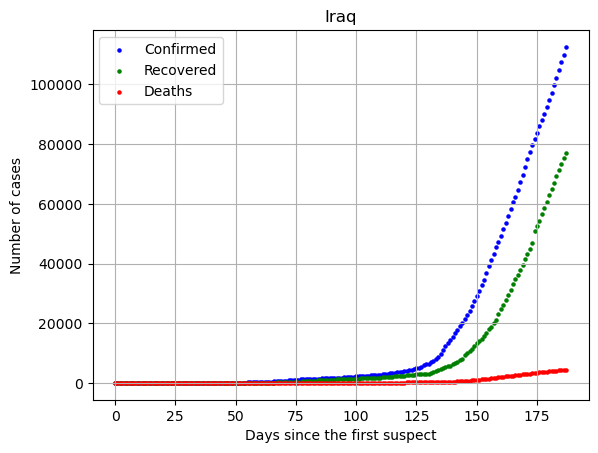

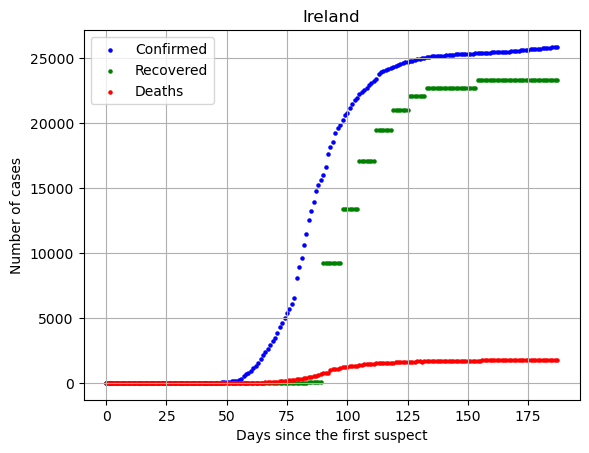

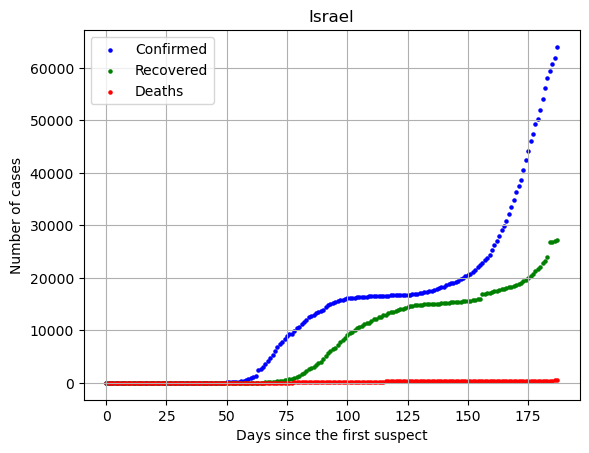

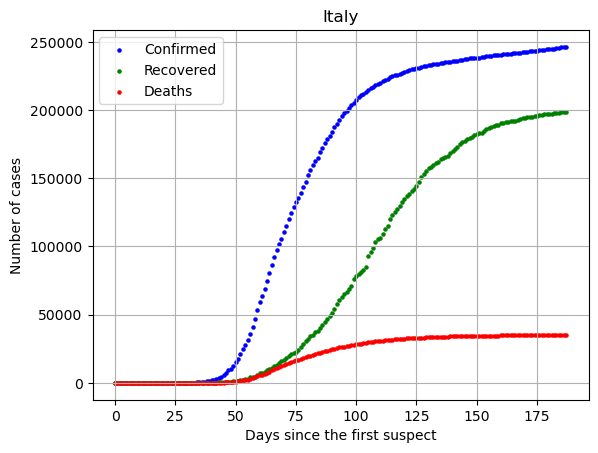

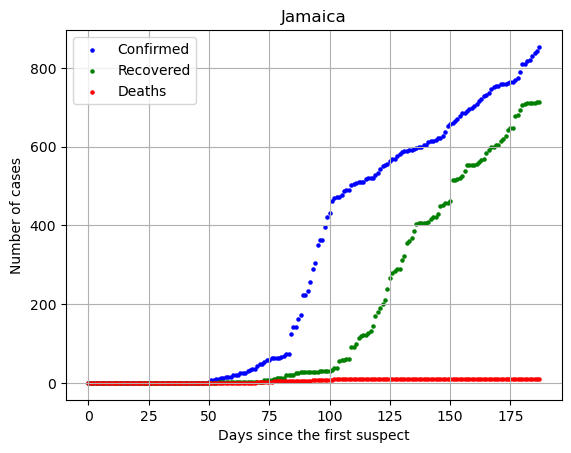

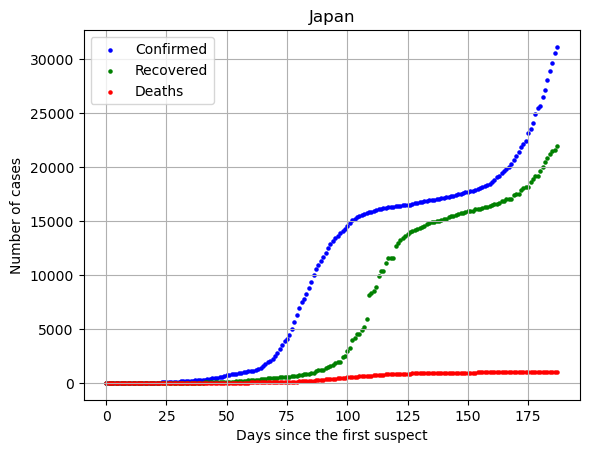

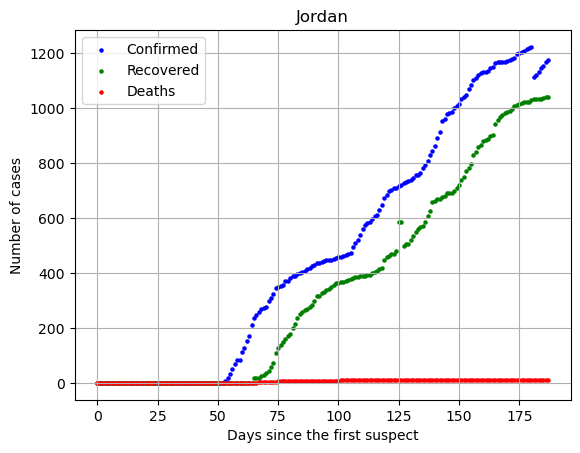

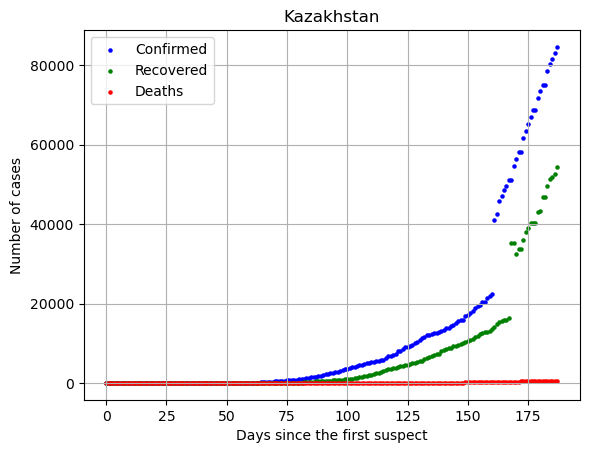

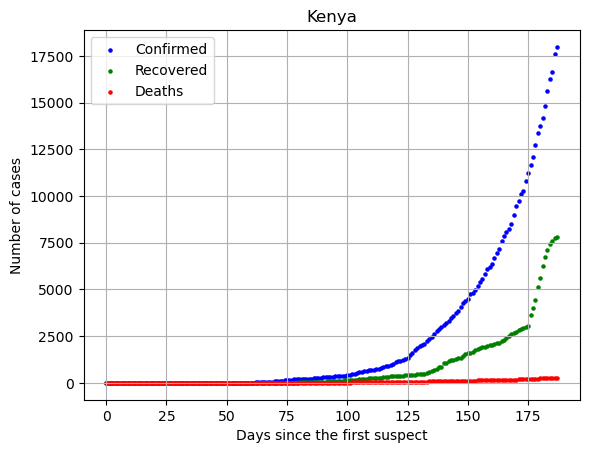

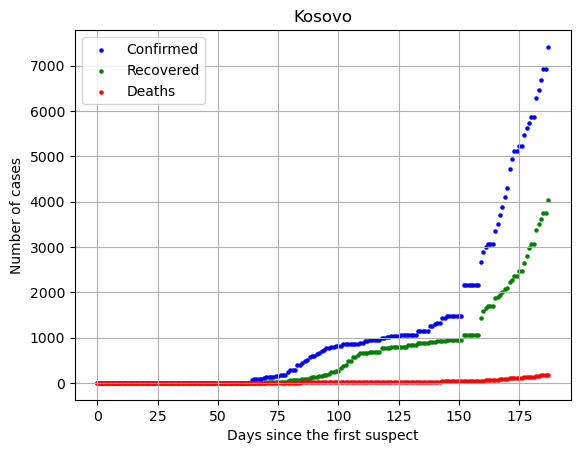

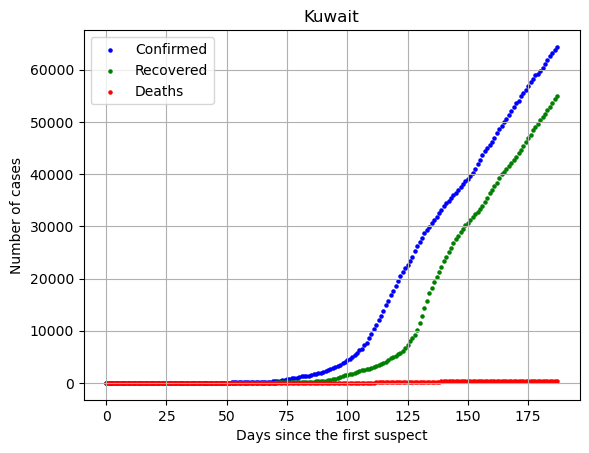

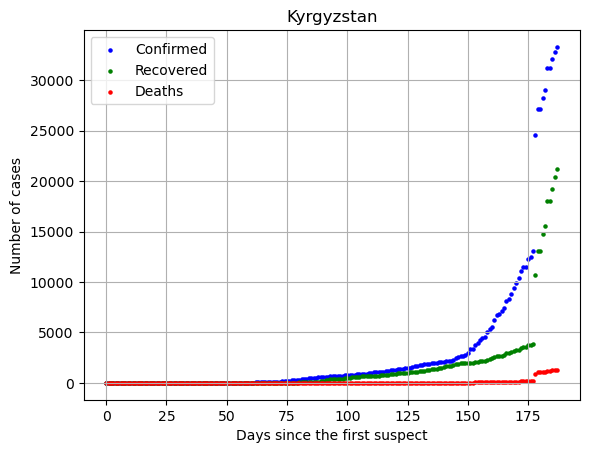

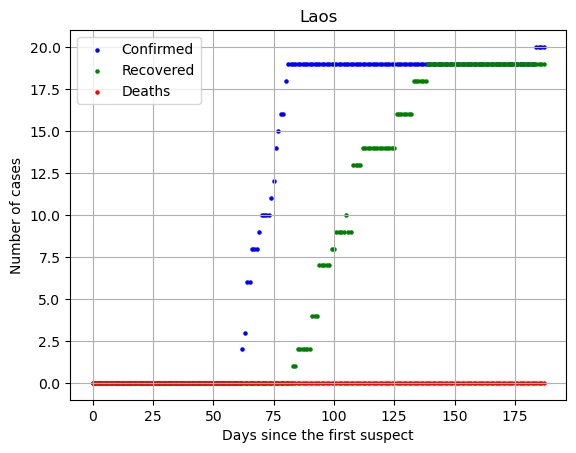

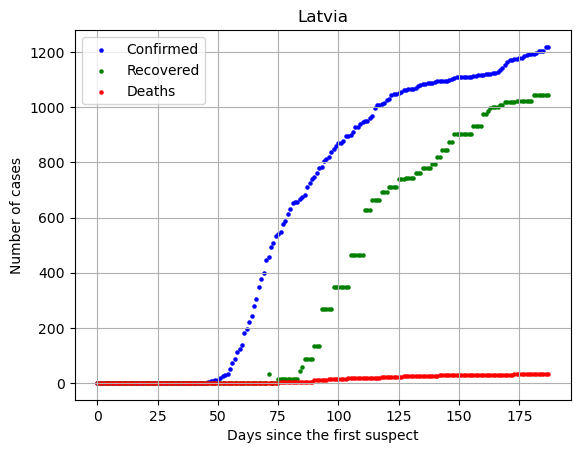

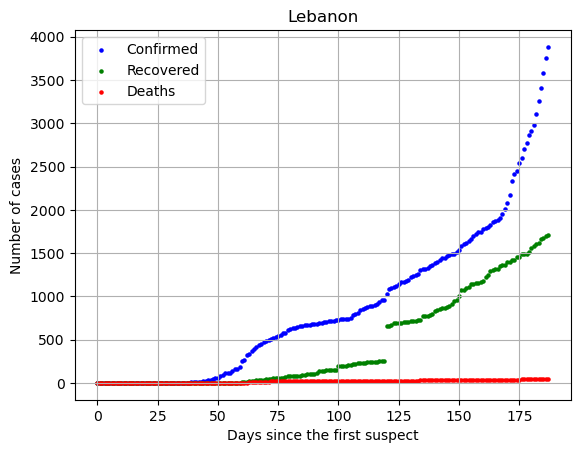

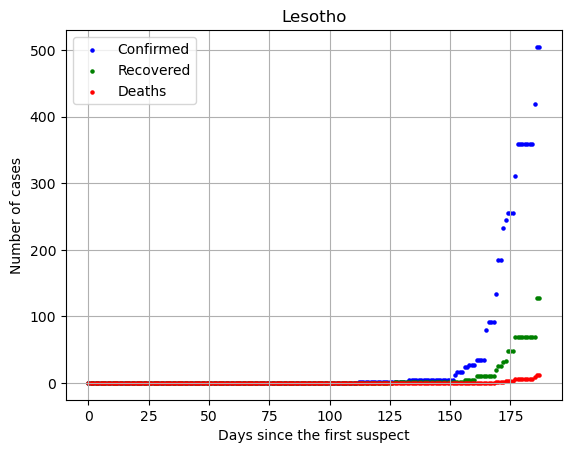

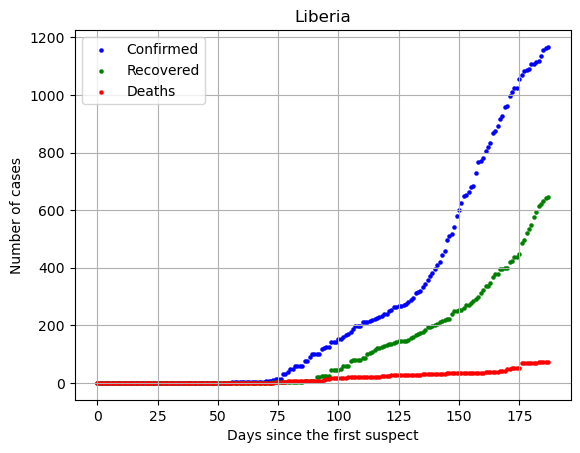

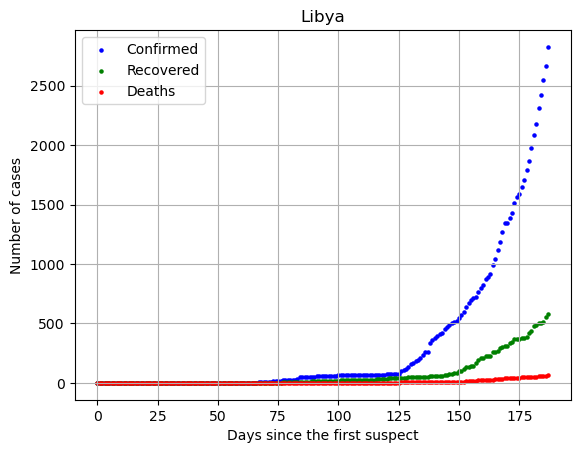

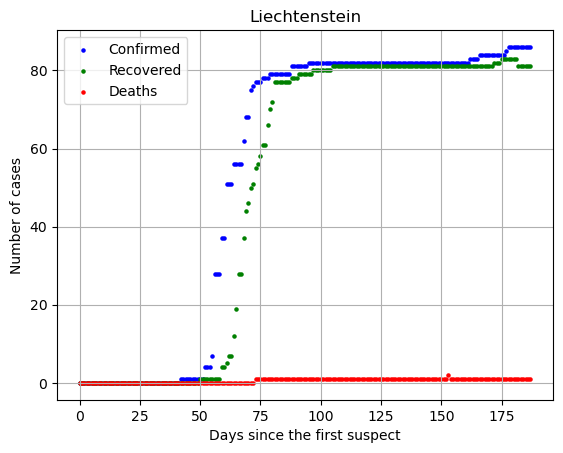

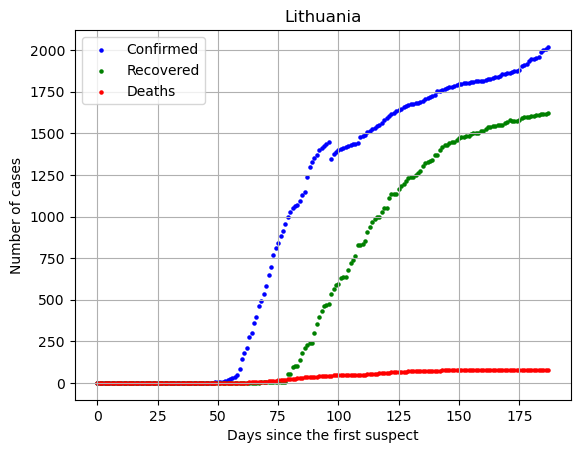

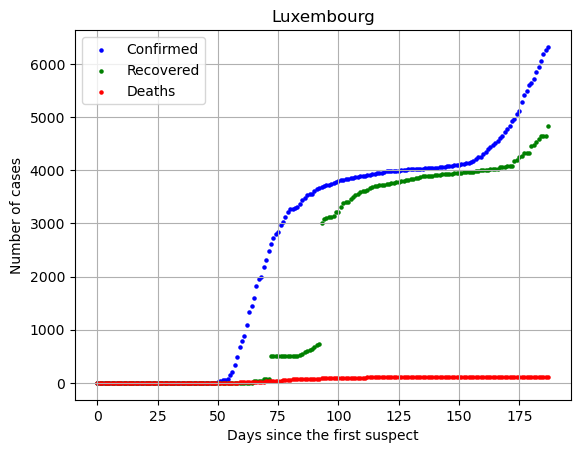

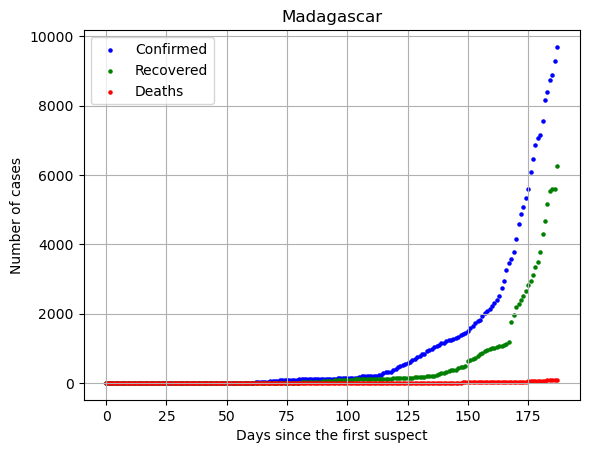

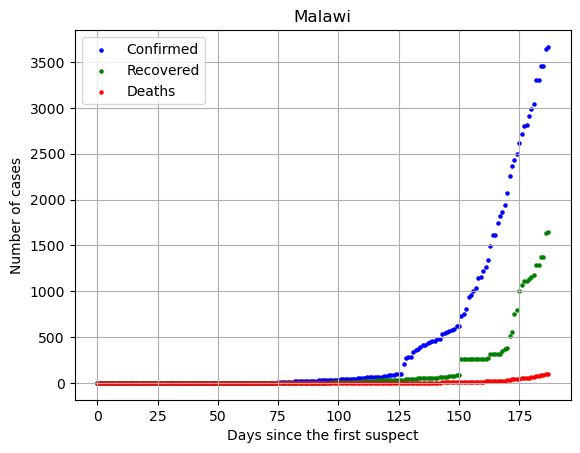

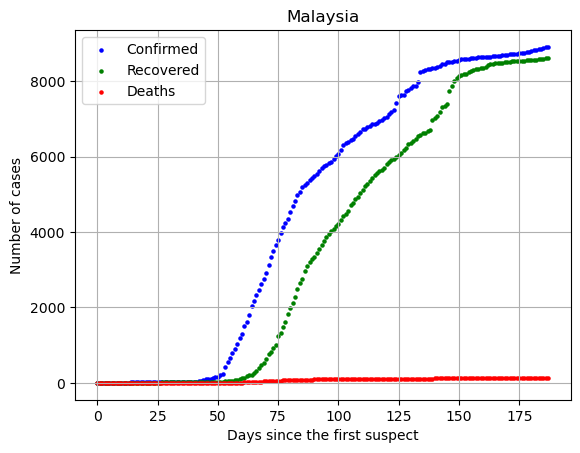

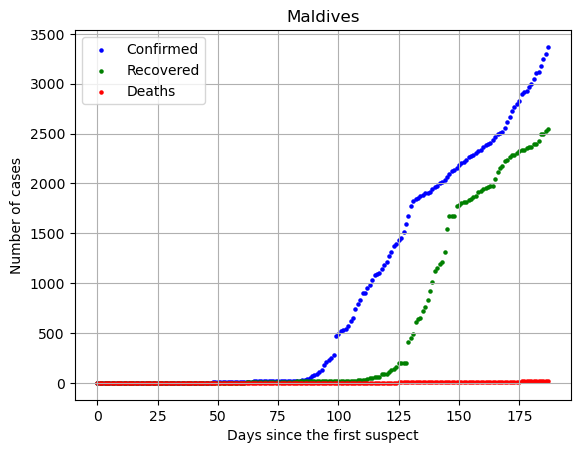

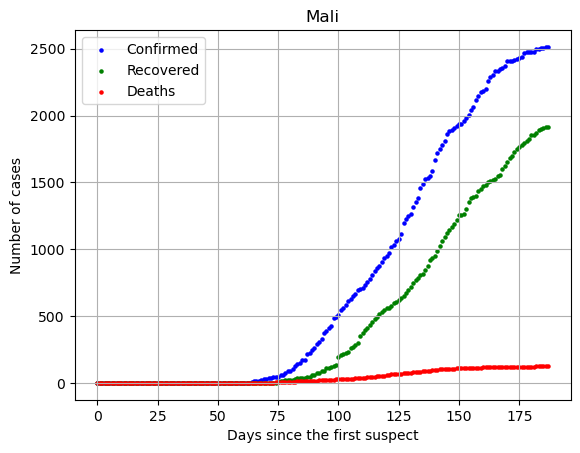

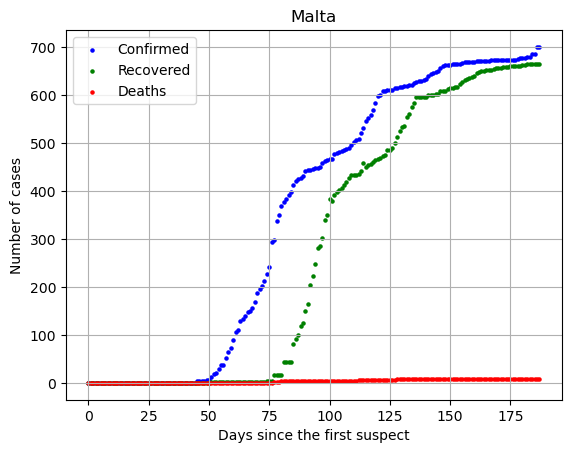

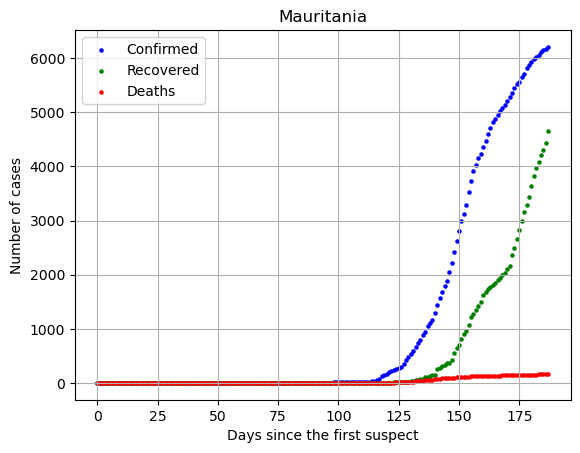

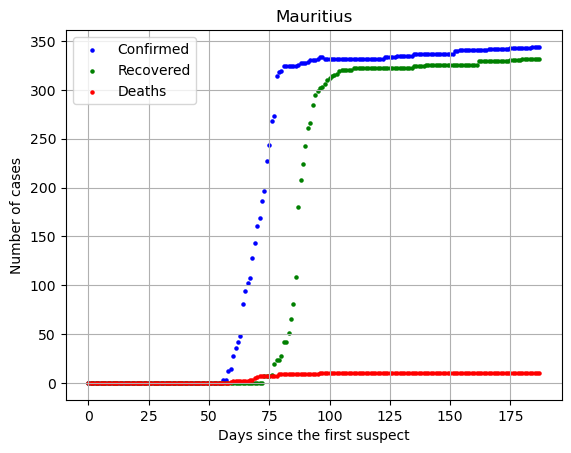

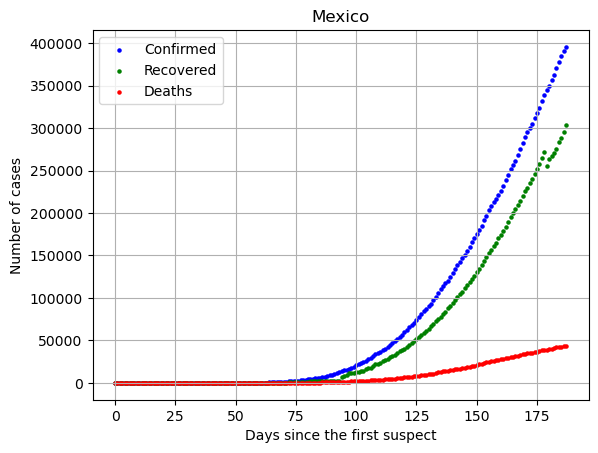

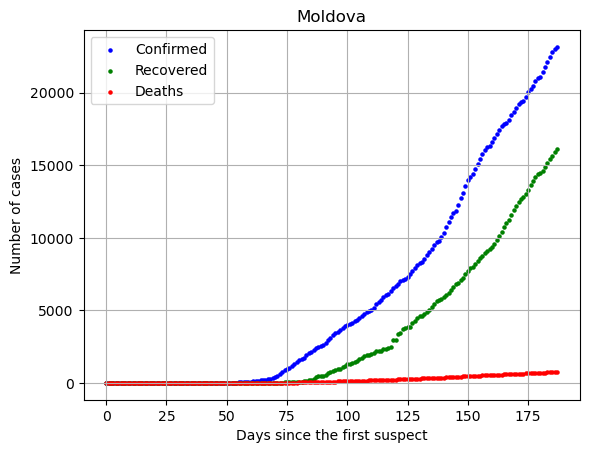

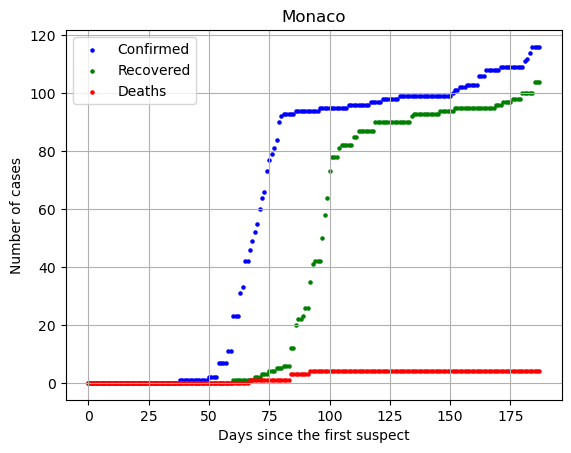

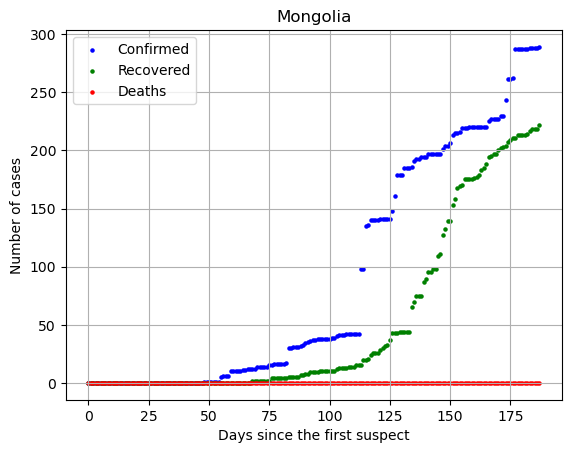

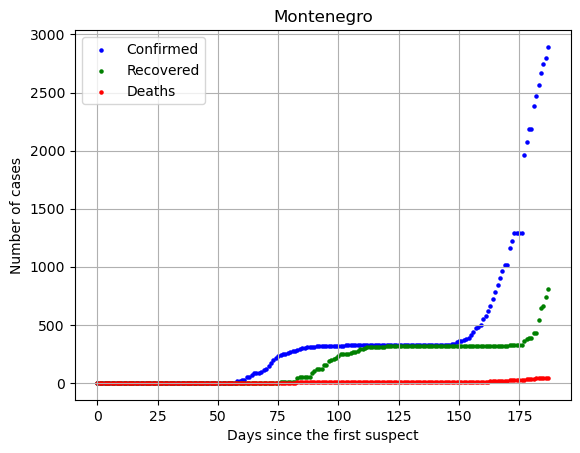

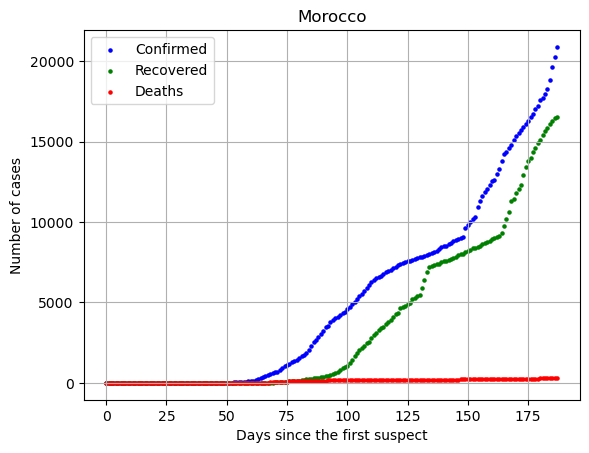

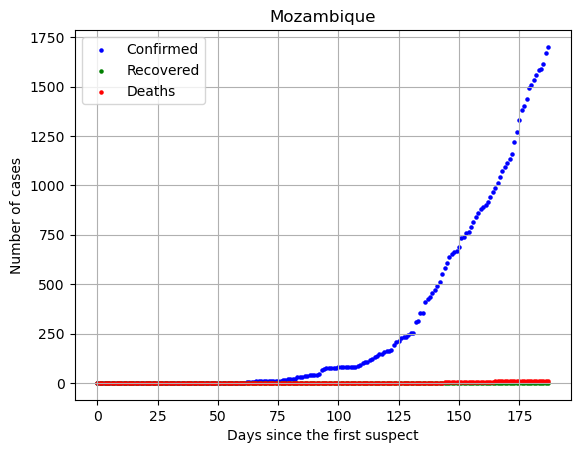

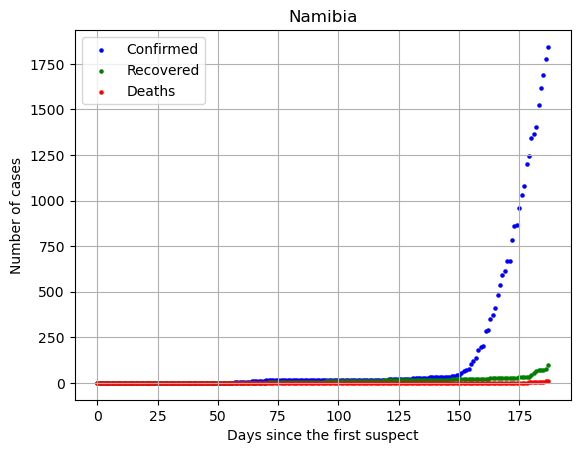

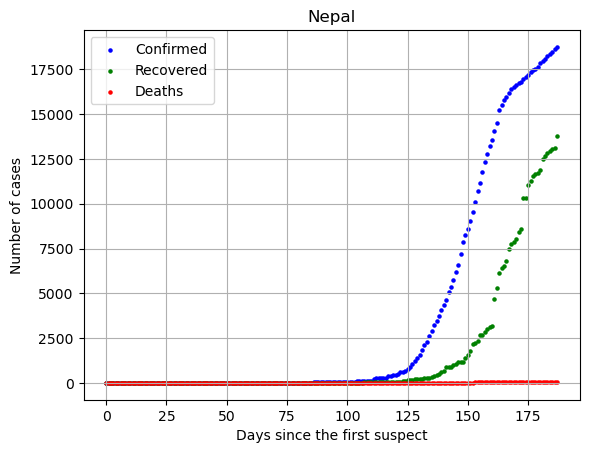

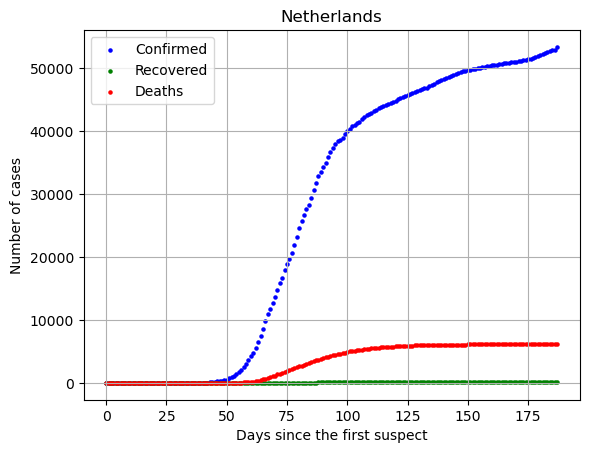

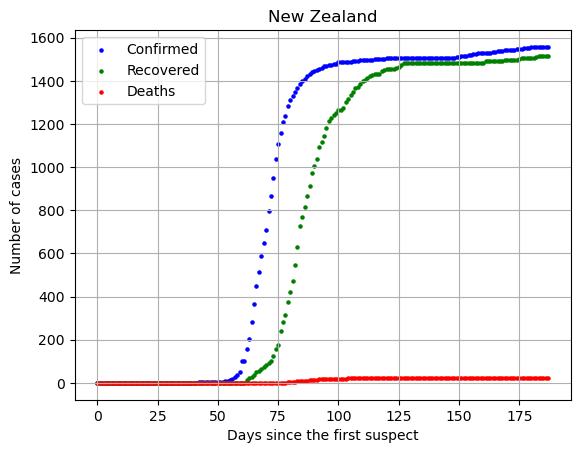

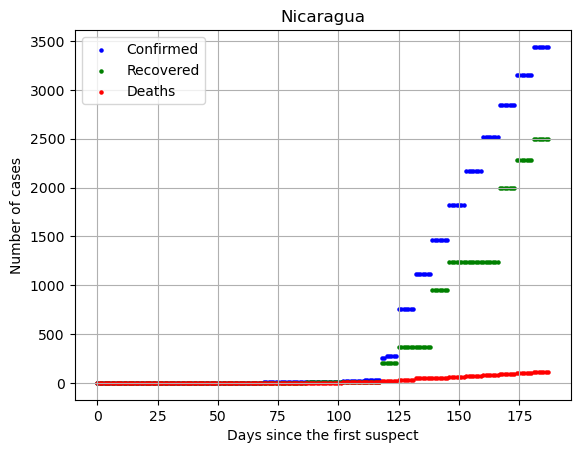

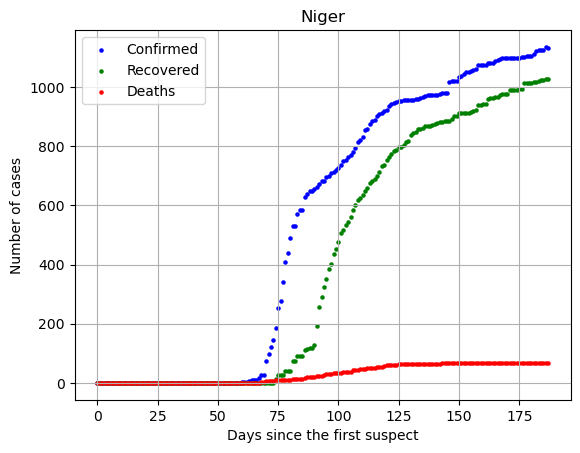

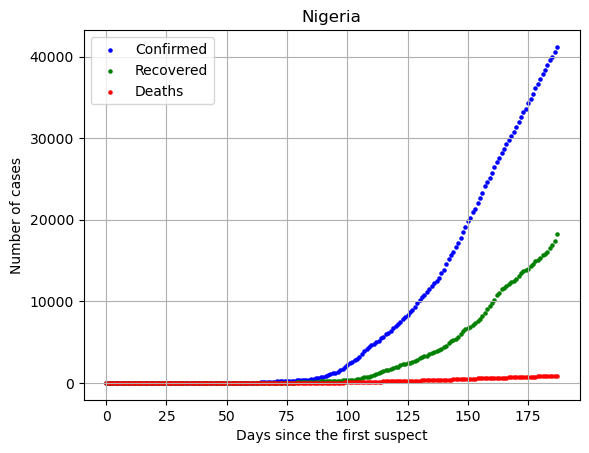

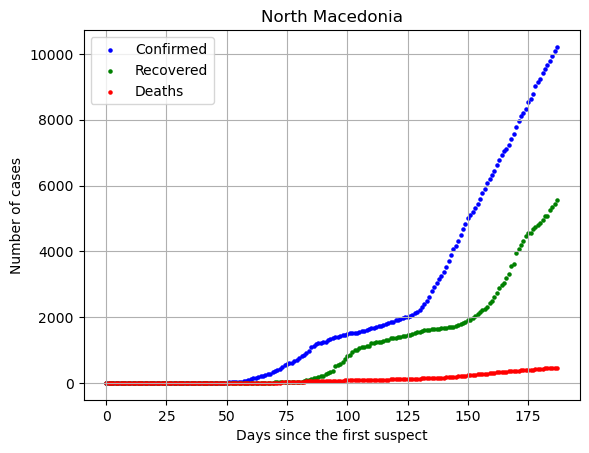

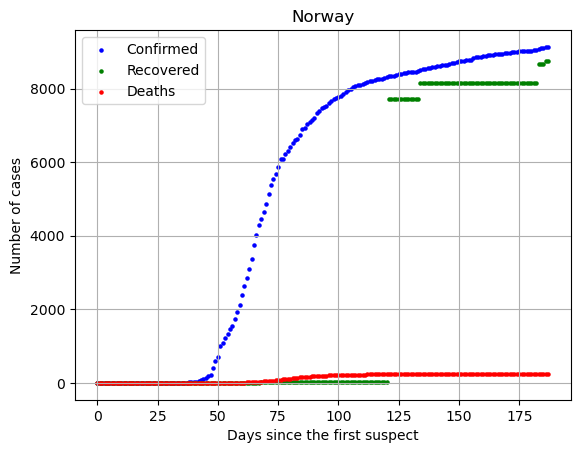

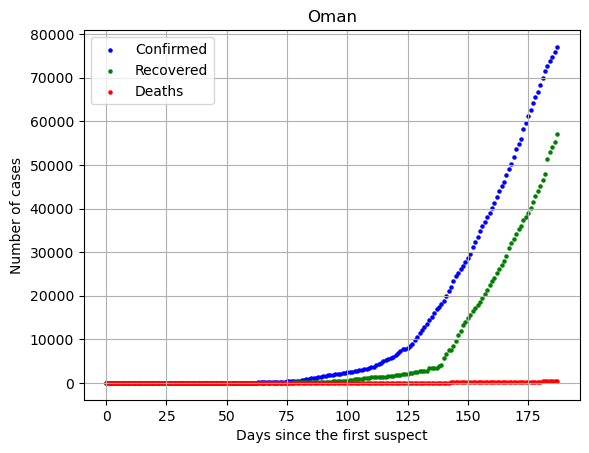

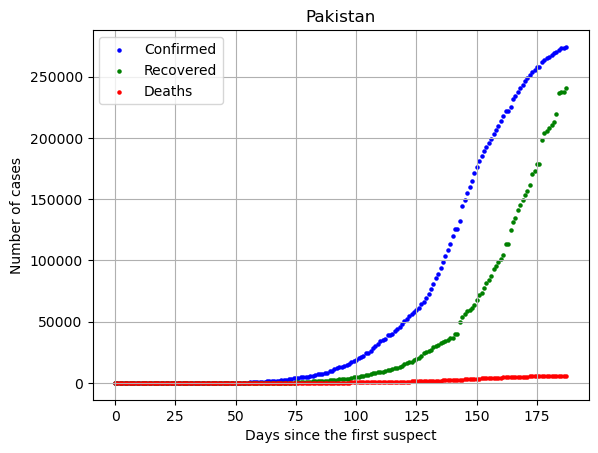

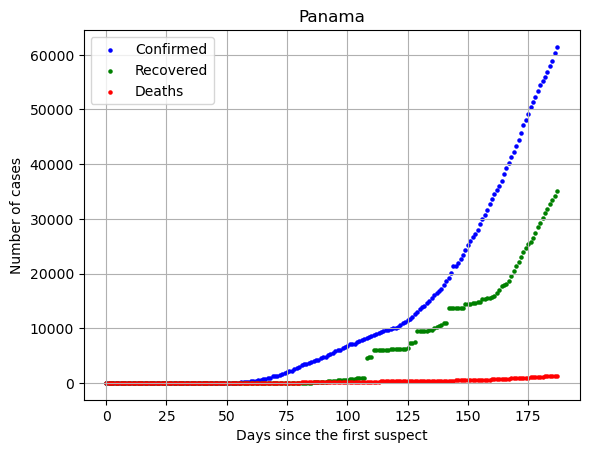

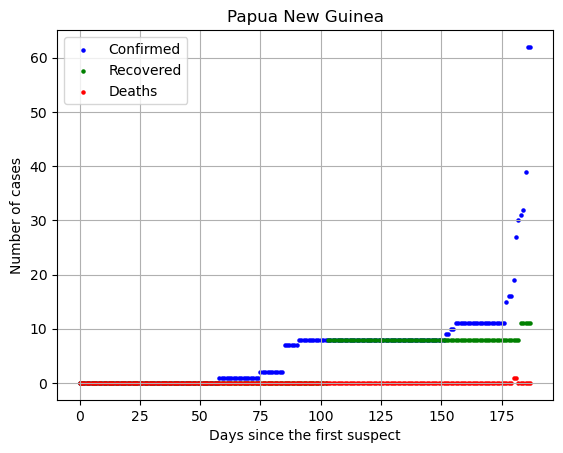

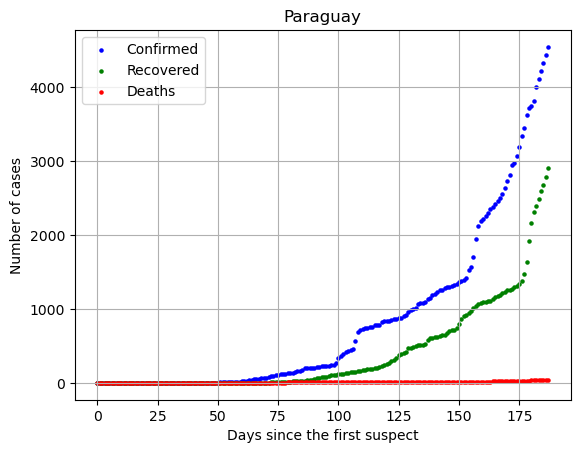

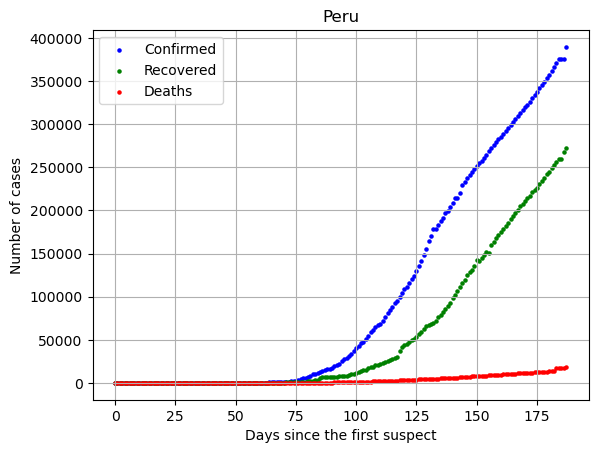

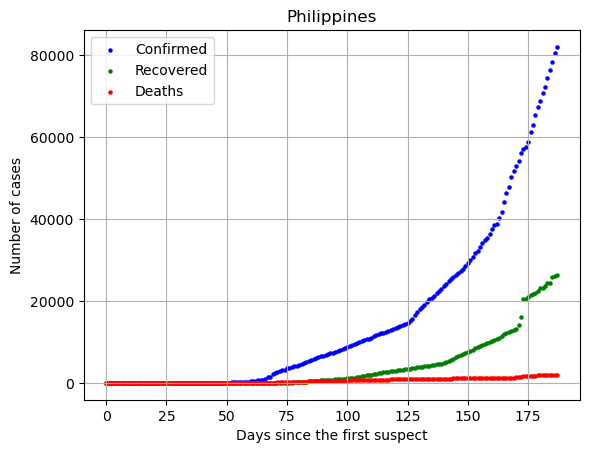

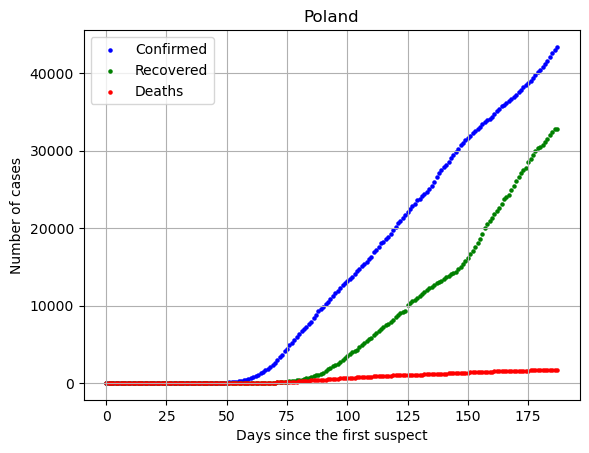

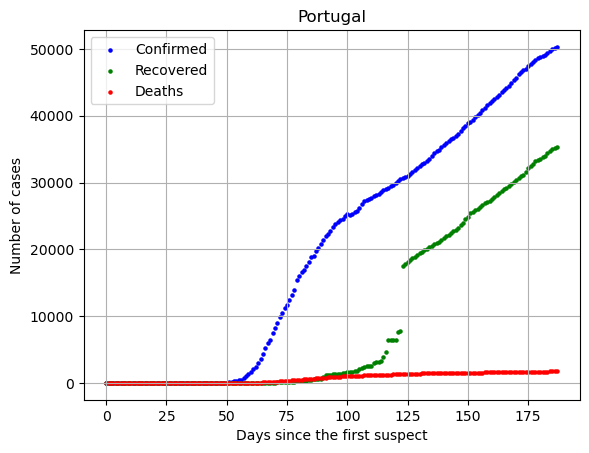

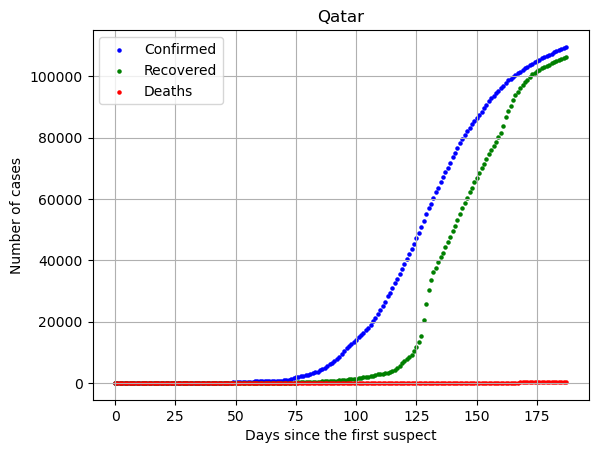

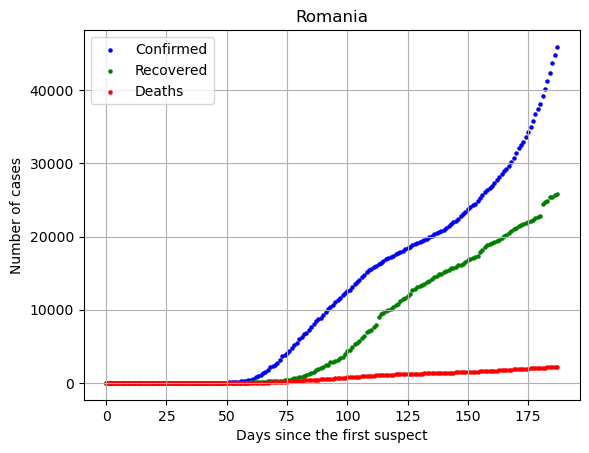

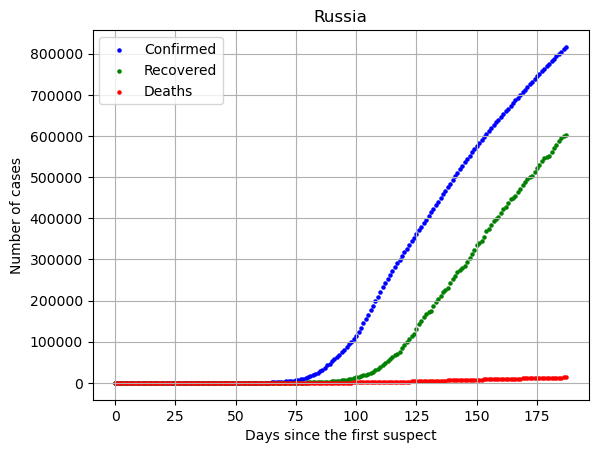

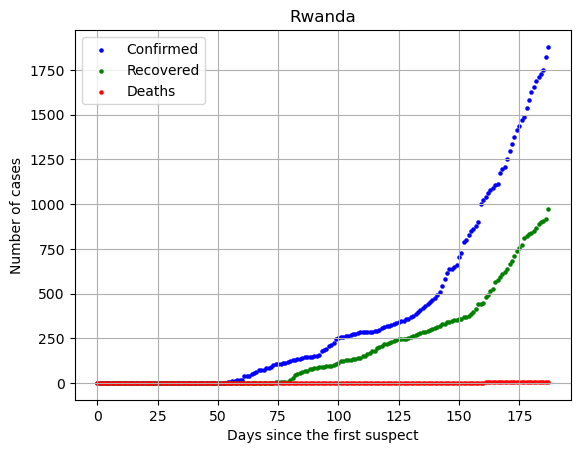

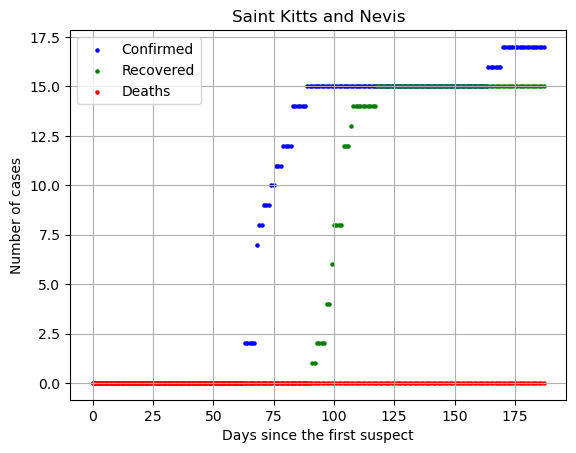

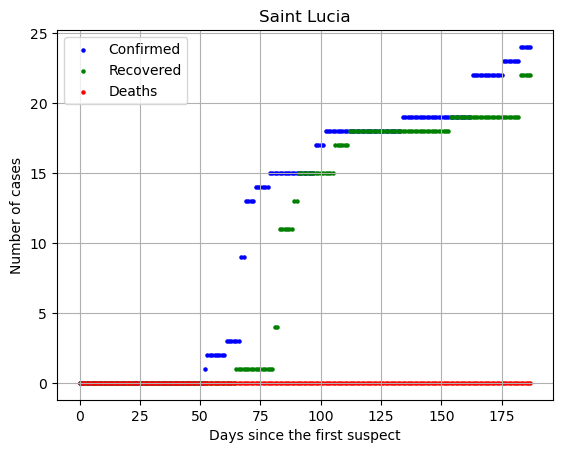

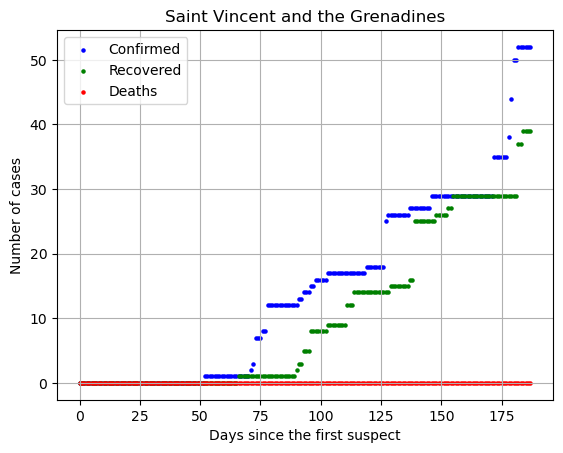

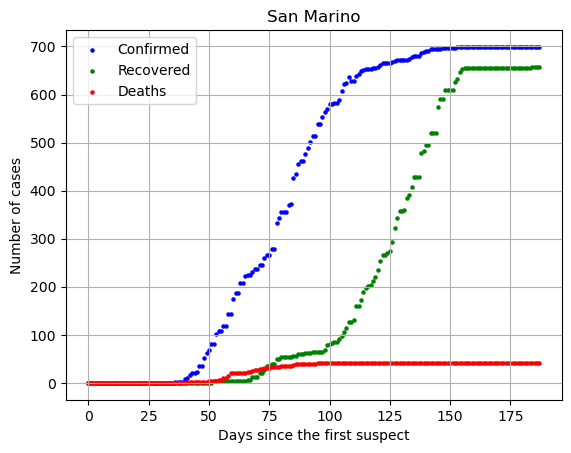

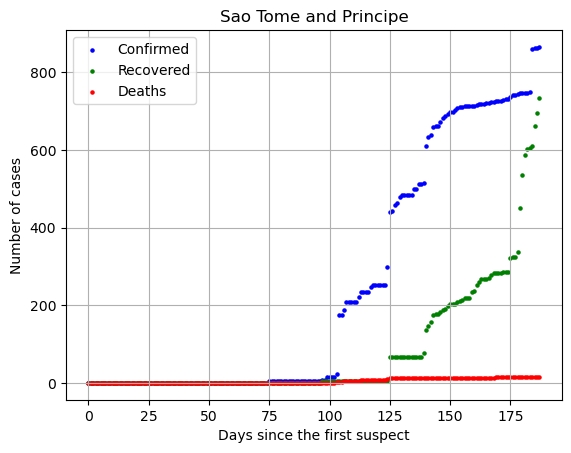

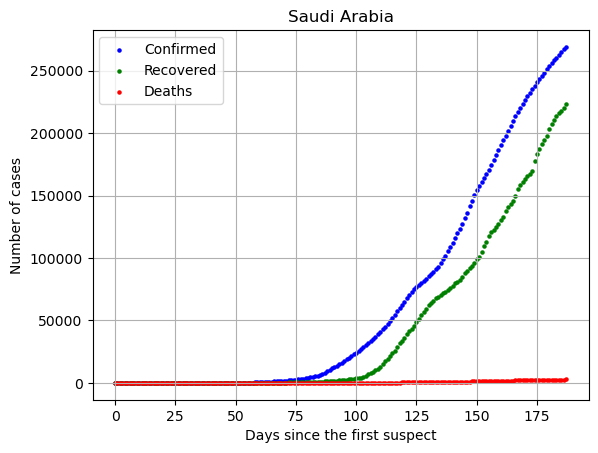

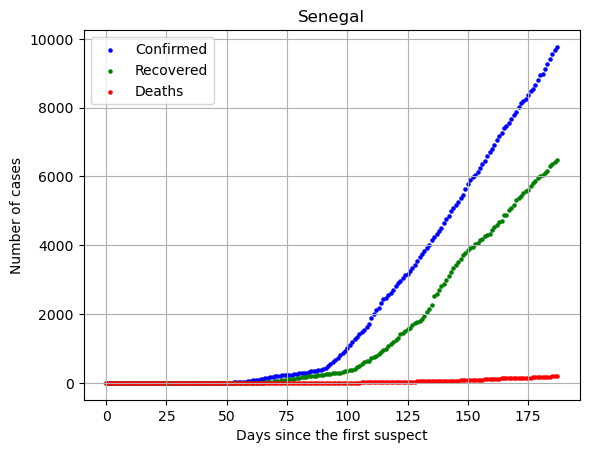

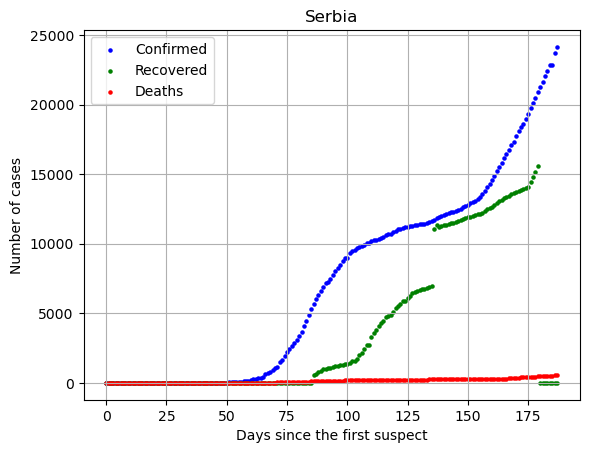

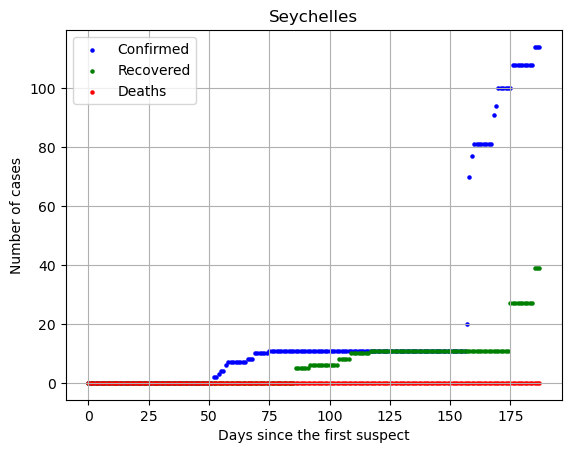

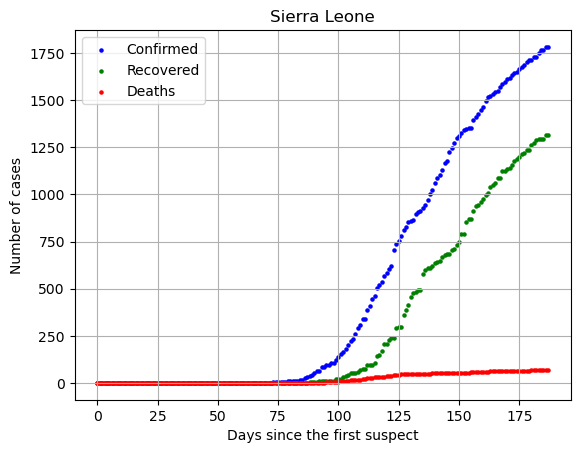

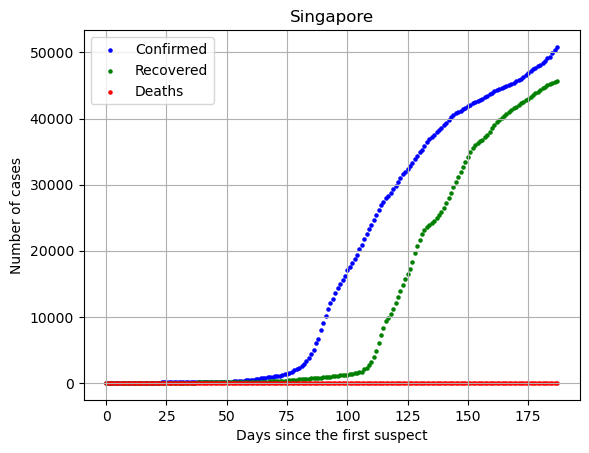

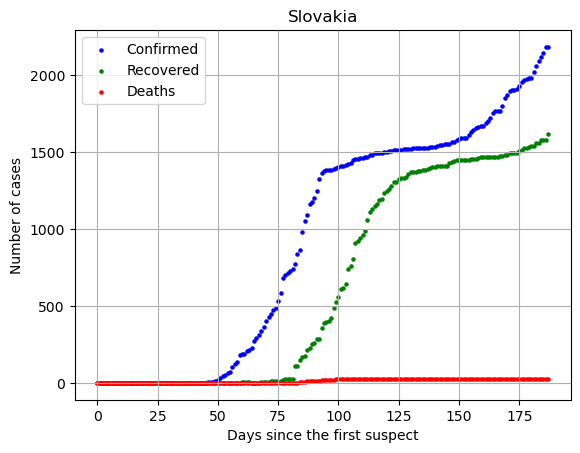

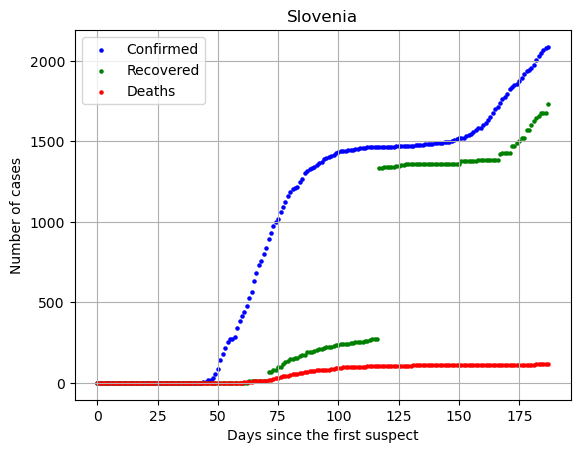

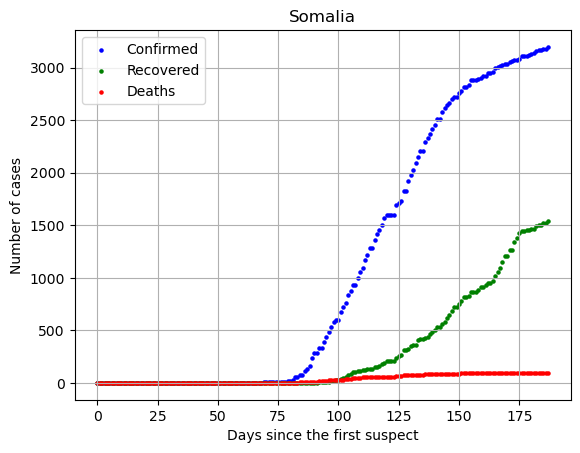

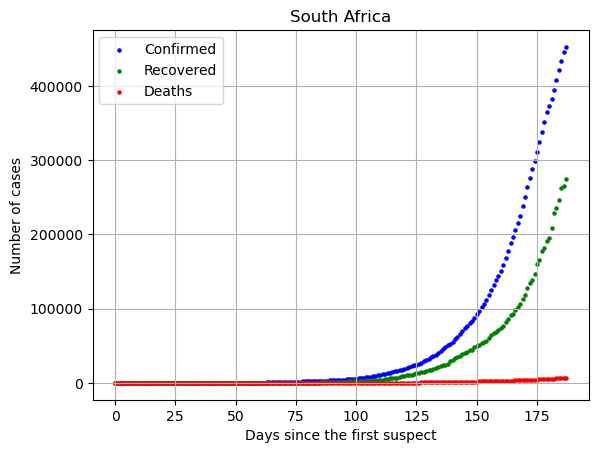

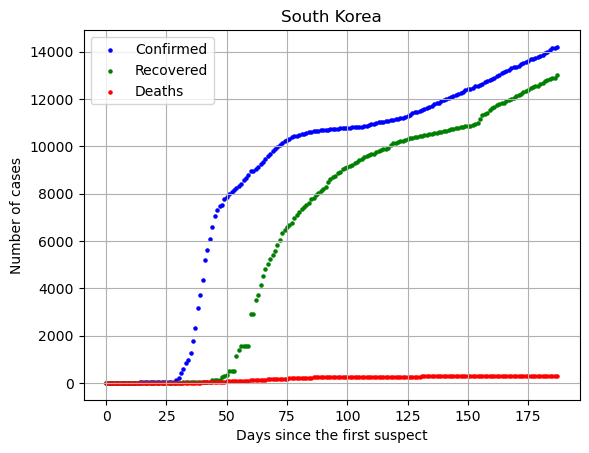

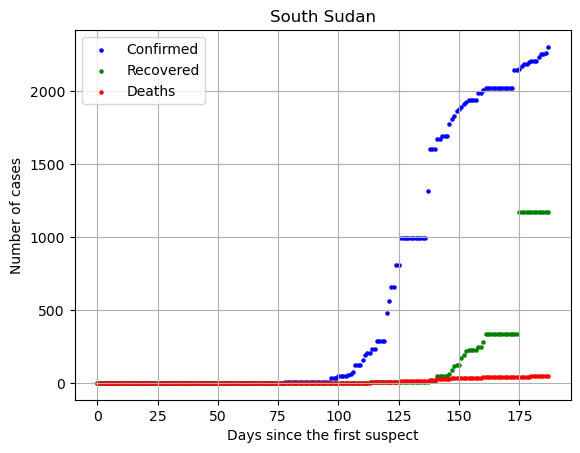

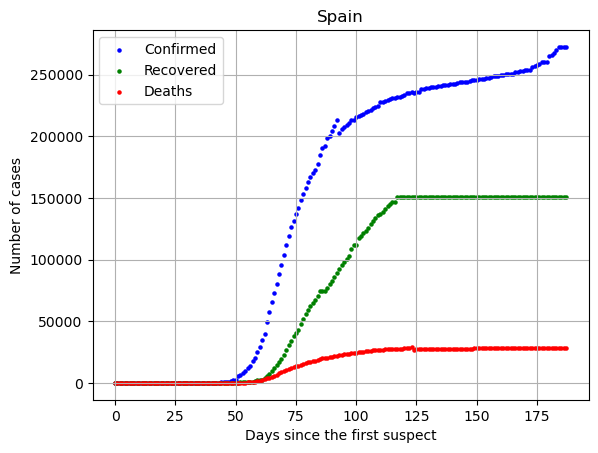

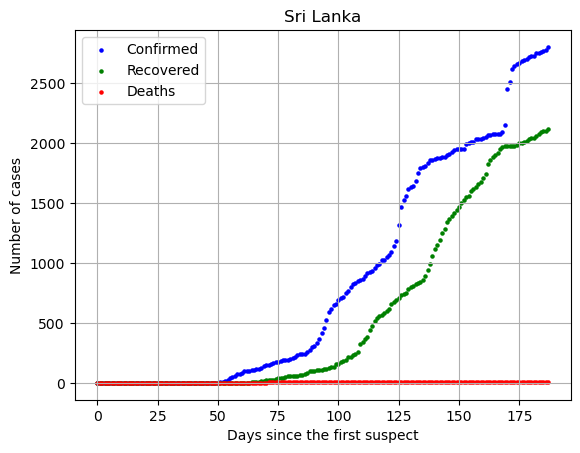

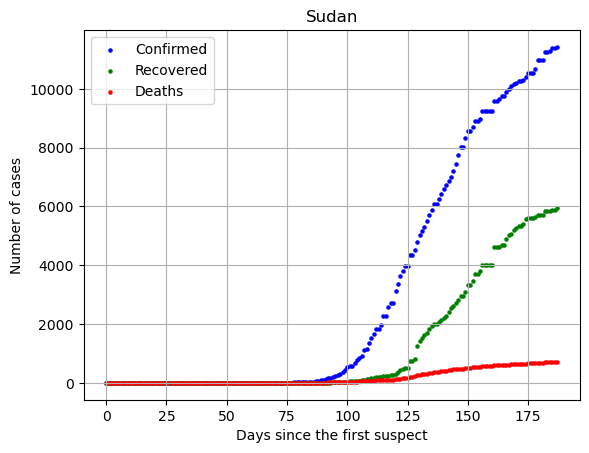

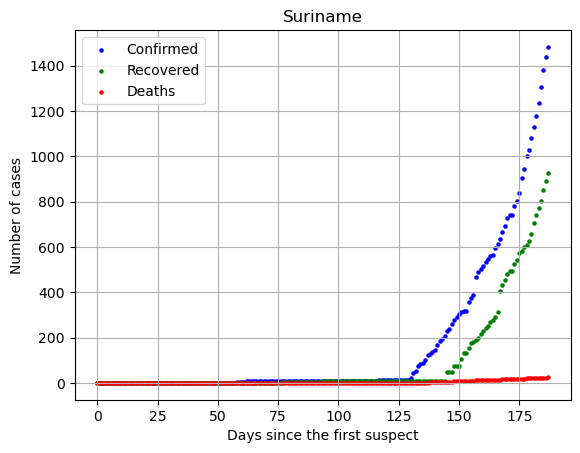

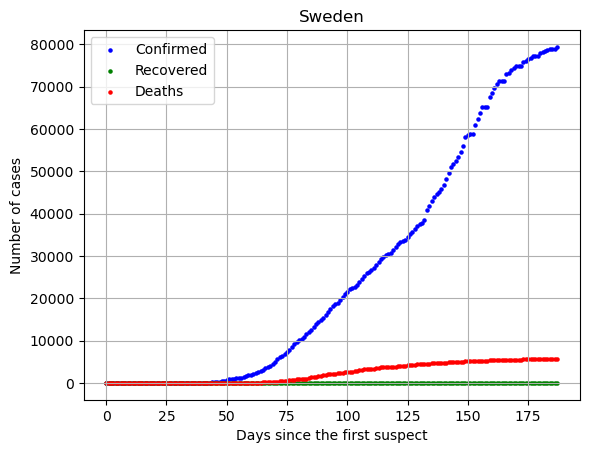

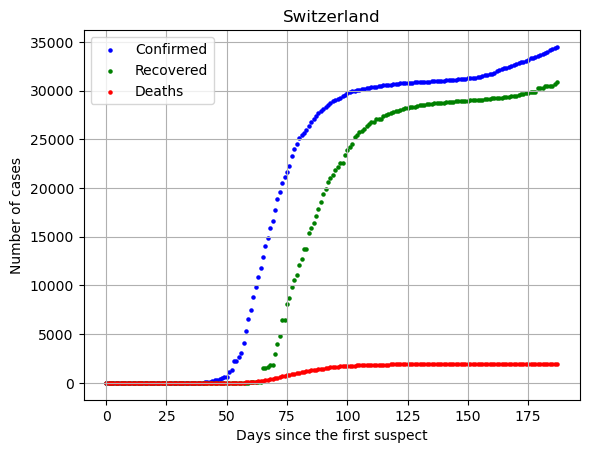

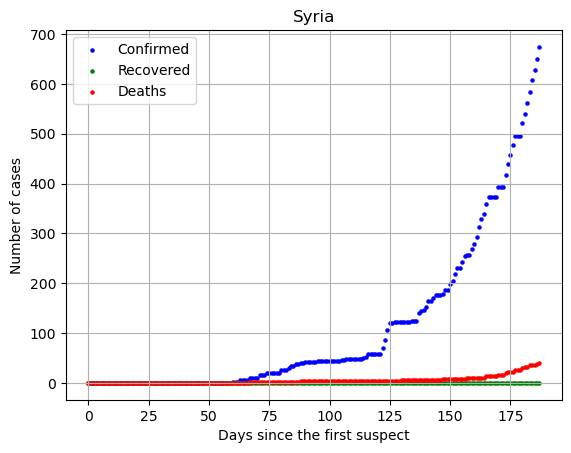

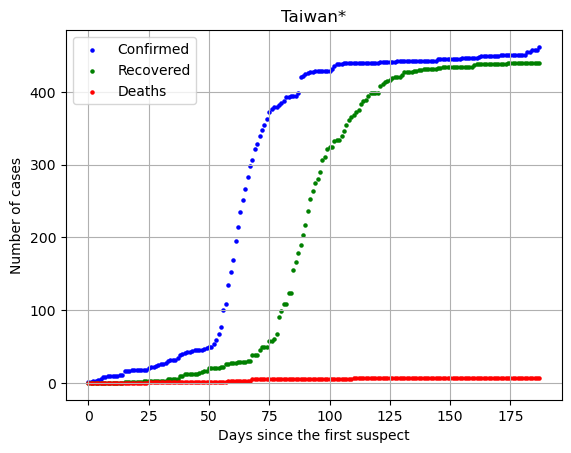

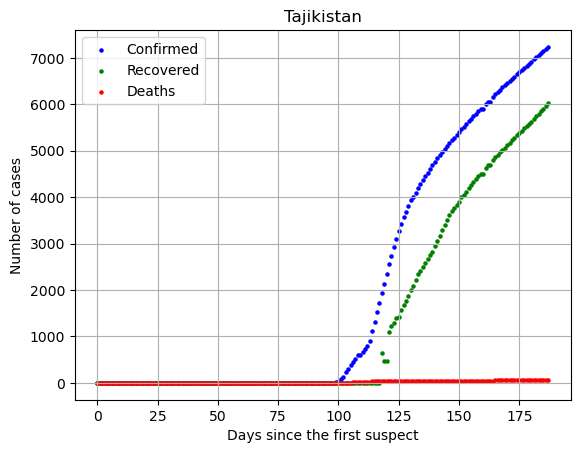

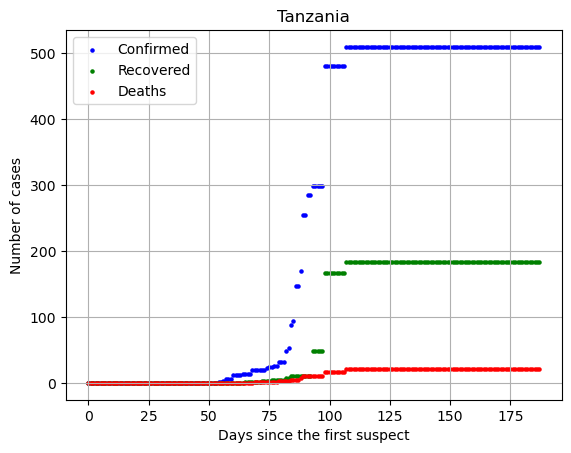

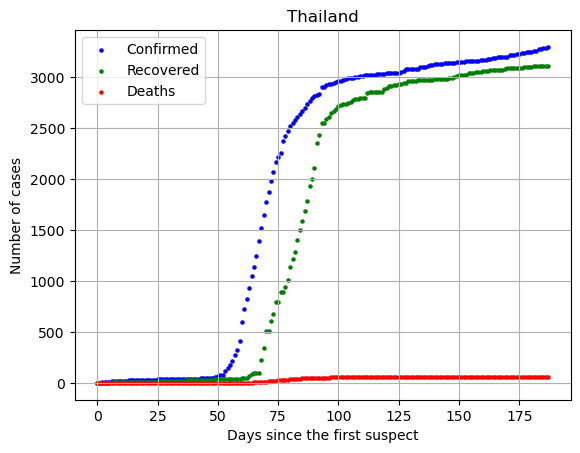

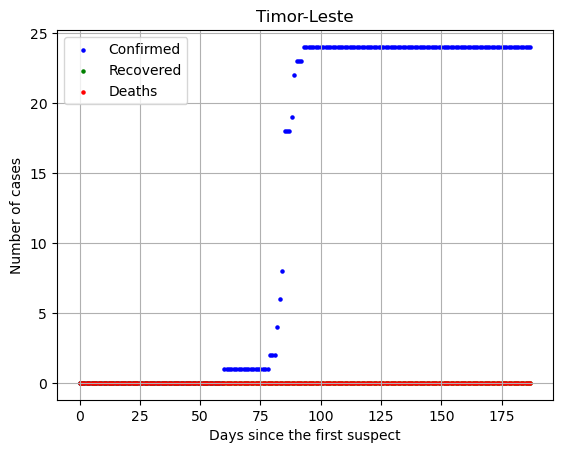

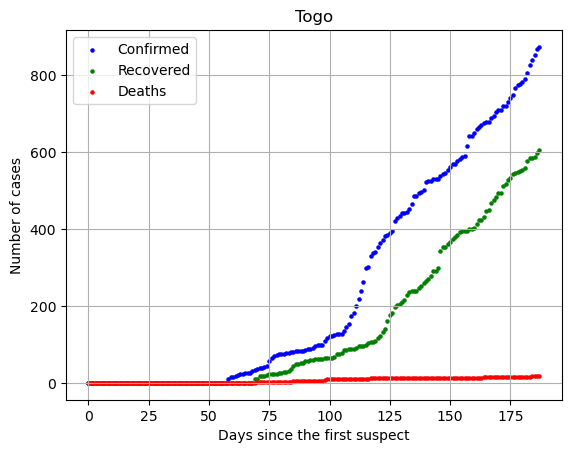

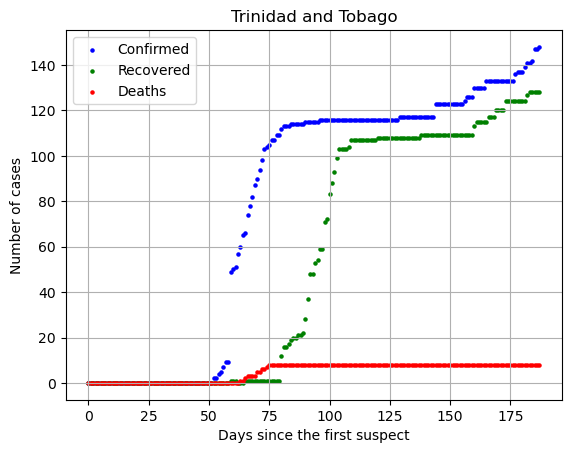

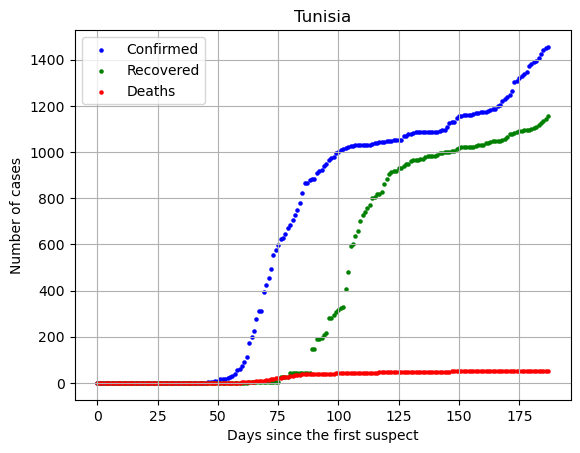

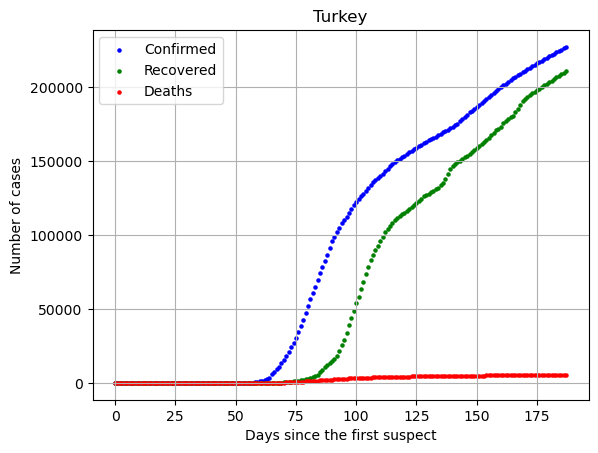

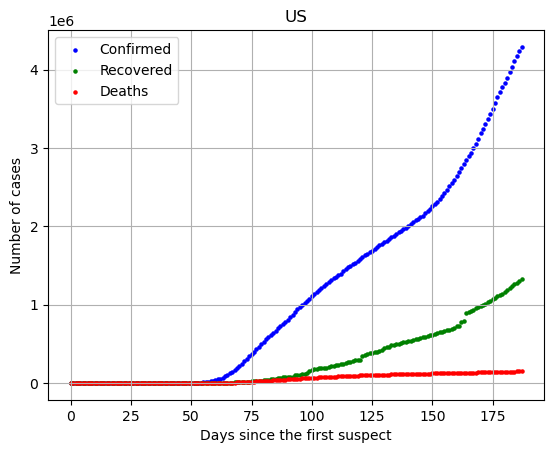

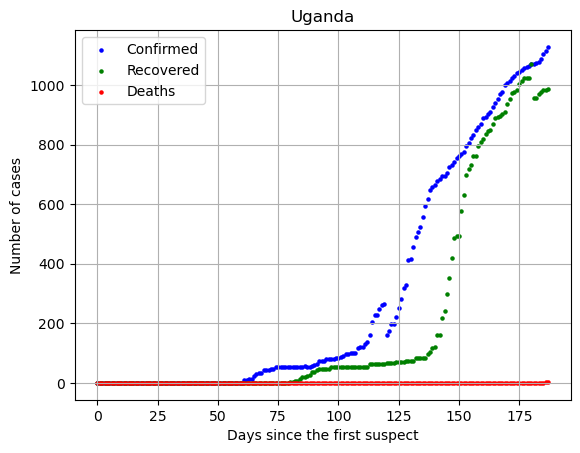

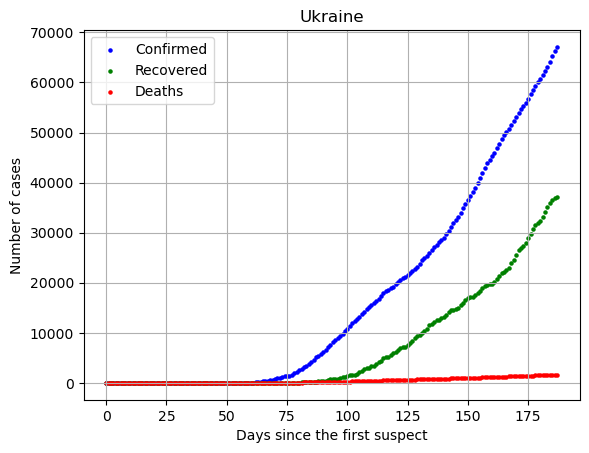

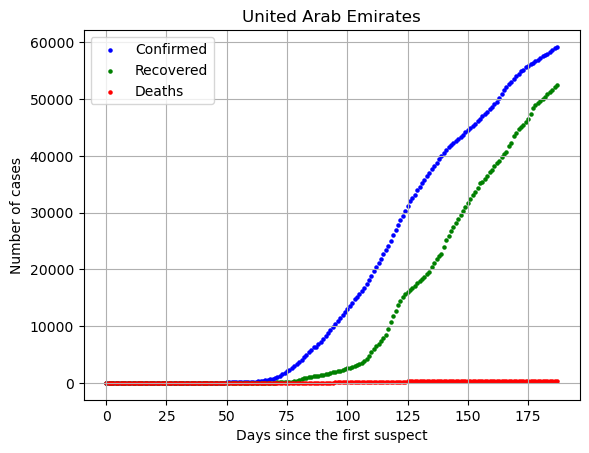

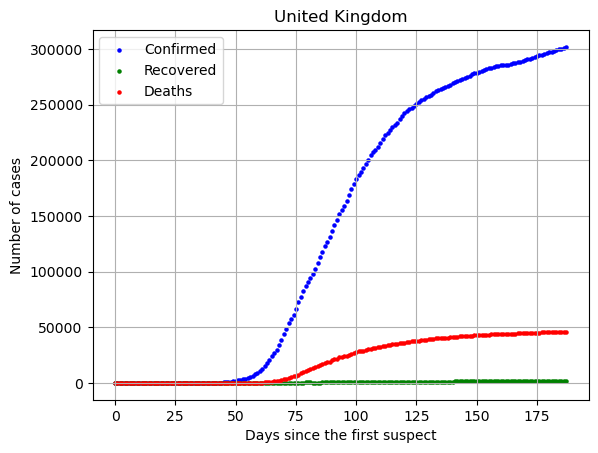

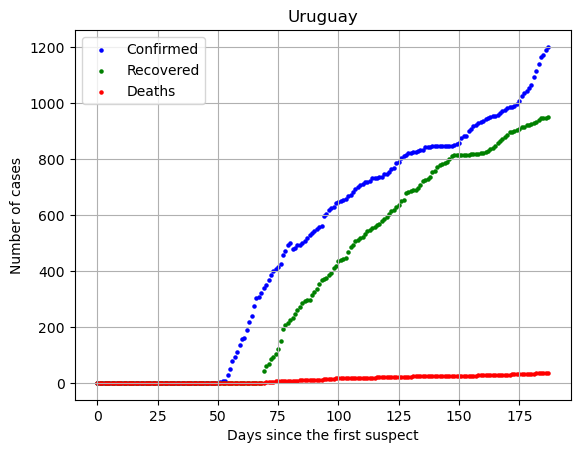

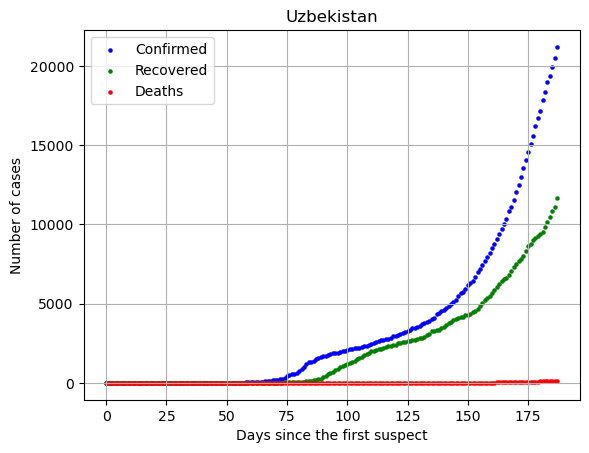

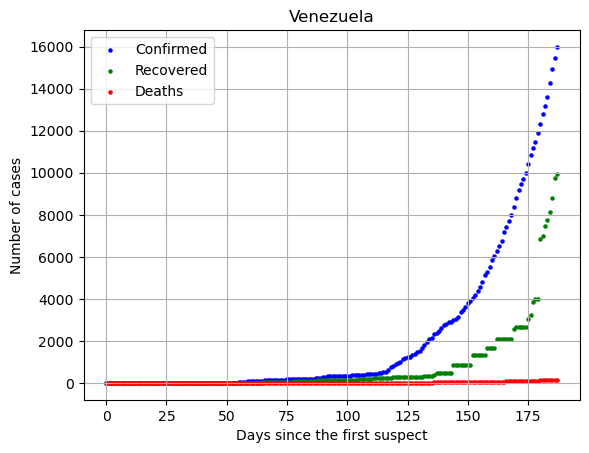

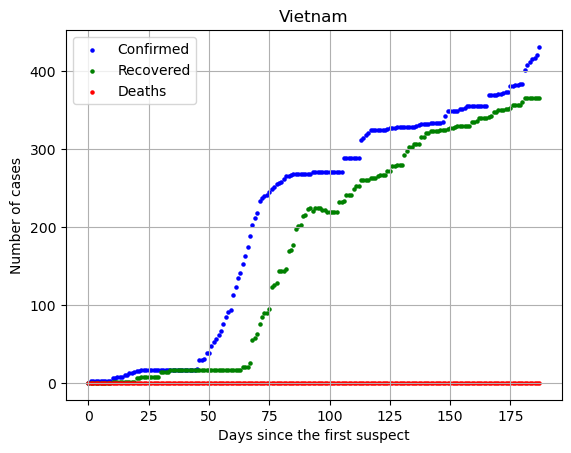

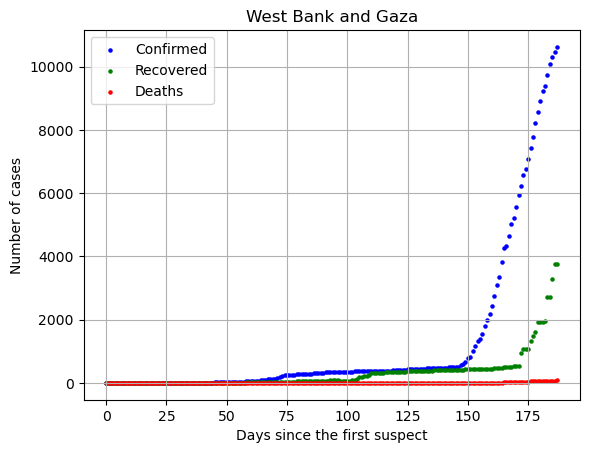

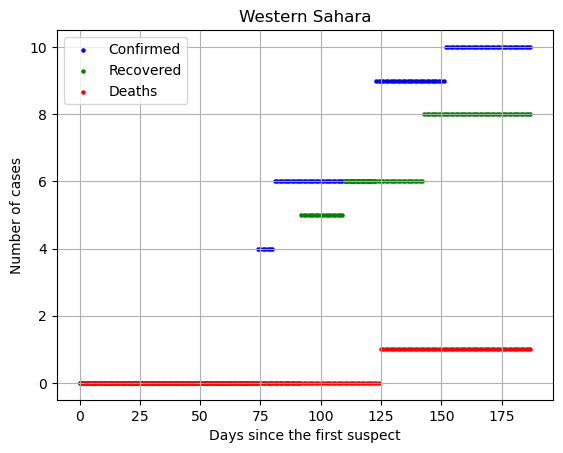

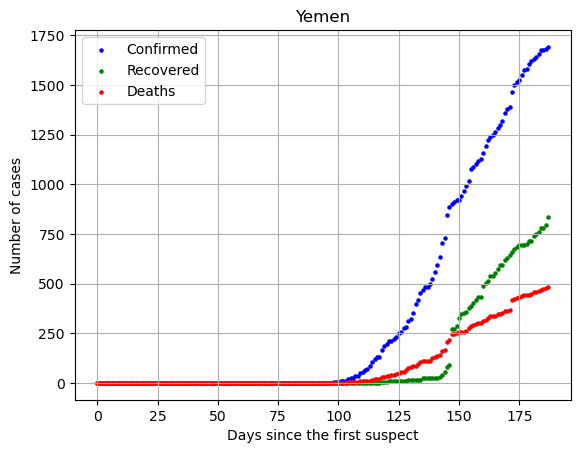

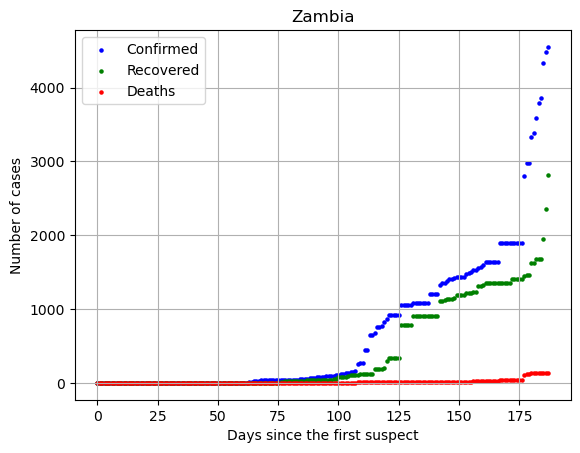

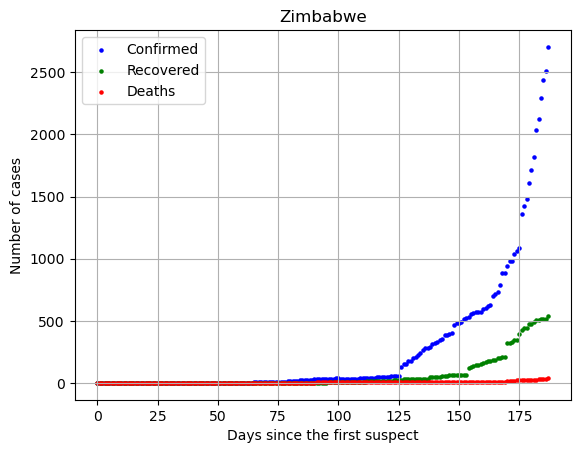

In [51]:
for idx in range(0,len(countries)):
    C = df3[df3['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],s=5,color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],s=5,color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],s=5,color='red',label='Deaths')
    plt.title(countries[idx])
    plt.grid(visible=True)
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [84]:
df4 = df3.groupby(['Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

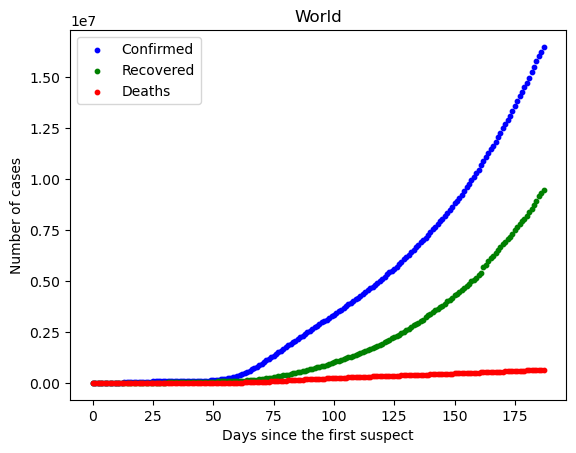

In [86]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],s=10,color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],s=10,color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],s=10,color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

